# Domain Size Statistical Analysis

**Author:** Dmitry Chezganov (GitHub: [DexterChe](https://github.com/DexterChe))  
**Date Created:** 25/10/2024 

This Jupyter Notebook is designed for the statistical treatment of domain sizes. It utilizes various Python libraries for numerical operations, data manipulation, statistical analysis, and visualization. The main tasks performed in this notebook include:

- Reading data from text files and organizing it into pandas DataFrame structures.
- Creating and saving statistical data such as mean, standard deviation, median, mode, variance, skewness, and kurtosis.
- Visualizing data using histograms, KDE plots, box plots, and bar charts.
- Exporting statistical tables to Microsoft Word format.

This notebook demonstrates skills in data handling, analysis, and visualization, as well as the ability to use various Python libraries to solve data processing tasks. It can be useful for potential employers to assess my skills and experience in data analysis and Python programming.

## Contents

1. Import necessary libraries and modules.
2. Define functions for creating folders and processing data.
3. Read folder and file structure containing data.
4. Create pandas DataFrames from text files.
5. Save DataFrames to CSV files.
6. Calculate and save statistical data.
7. Export statistical tables to Microsoft Word format.
8. Visualize data using various plots and charts.


### This cell contains the imports of necessary libraries and modules used throughout the notebook. It includes libraries for numerical operations, data manipulation, statistical analysis, and plotting. Additionally, it imports modules for handling file operations and creating directories.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
from scipy.stats import norm
import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd
# import seaborn as sns

### This cell contains the definitions of two functions: `make_folder` and `adjust_data_range`. The `make_folder` function creates a new directory if it does not already exist, and returns the path to the newly created directory. The `adjust_data_range` function clips the values of a 2D numpy array (image) between specified lower and upper percentiles.

In [2]:
# make a folder
def make_folder(path_to_folder_to_read, folder_name):
    if not os.path.exists(os.path.join((path_to_folder_to_read + folder_name))):
        try:
            os.makedirs(os.path.join(path_to_folder_to_read + folder_name))
        except OSError: print(f'Creation of the directory {os.path.join(path_to_folder_to_read + folder_name)} failed. Probably already present.\n')
        else:
            print(f'Successfully created the directory {os.path.join(path_to_folder_to_read + folder_name)}\n')
    path_to_save = path_to_folder_to_read +folder_name+'/'
    return path_to_save

def adjust_data_range(image: np.ndarray,
                        p_low: float=0.5,
                        p_high: float=99.8) -> np.ndarray:
    """Clip image values between the p_low and p_high percentile values
    Args:
        image: 2D numpy array
        p_low: lower percentile value (default: 5)
        p_high: higher percentile value (default: 95)
    Return:
        clipped image
    """
    if image is None:
        raise ValueError("Image is None")
    if image.ndim != 2:
        raise ValueError("Image must be 2D")
    low, top = np.percentile(image, (p_low, p_high))
    image = np.clip(image, low, top) # clip the image between low and top
    return image

### Definition of paths to data and folders to save results

In [ ]:
print(f'######################\n')
print(f'Current working directory: {os.getcwd()}\n')
# path with folders that contains the domain size data as txt files
path_to_read = '/Users/dmitrychezganov/Library/CloudStorage/SynologyDrive-Macbook1/Coding/Github_portfolio/Ordered_disordered_domains/domain_sizes/'

print(f'-----------------------\n')
# folder to save plots
print(f'Folder to save plots: {path_to_read}\n')
path_to_save_big_plots = make_folder(path_to_read, 'plots')
print(f'######################\n')

# folder to save csv files
print(f'Folder to save csv files: {path_to_read}\n')
path_to_save_csv = make_folder(path_to_read, 'csv_data')
print(f'######################\n')

### This code performs the following tasks:

1. Prints the list of folders in the working directory.
2. Excludes folders named 'plots', 'csv_data', and 'plots_old' from the list.
3. Creates a dictionary where the keys are folder names and the values are lists of subfolders.
4. Prints the names of folders and their subfolders.
5. Sorts the dictionary of folders by keys.

This code is useful for organizing and displaying the structure of directories and subdirectories in the specified path.

In [7]:

print(f'Folders in the working directory:\n')
# get all folders in the path
folders = glob.glob(path_to_read + '*/')
for i, folder in enumerate(folders):
    # take the name of the last folder in the path
    folder = folder.split('/')[-2]
    print(f'{i+1}. {folder}')
# exclude the folder path that ends with 'plots'
folders = [folder for folder in folders if folder.split('/')[-2] != 'plots']
print(f'-----------------------\n')
# exclude the folder path that ends with 'plots'
folders = [folder for folder in folders if folder.split('/')[-2] != 'csv_data']
print(f'-----------------------\n')
# exclude the folder path that ends with 'plots'
folders = [folder for folder in folders if folder.split('/')[-2] != 'plots_old']
print(f'-----------------------\n')

# make a dictionary from the names of subfolders for each folder
folders_dict = {}
for folder in folders:
    # take the name of the last folder in the path
    folder_name = folder.split('/')[-2]
    # make a list of subfolders
    subfolders = glob.glob(folder + '*/')
    # make a dictionary from the names of subfolders for each folder
    folders_dict[folder_name] = subfolders

# print folders and subfolders
print(f'-----------------------\n')
print(f'Folders and subfolders with data in the working directory:\n')
for i, folder in enumerate(folders_dict.keys()):
    print(f'{i+1}. {folder}')
    for j, subfolder in enumerate(folders_dict[folder]):
        subfolder = subfolder.split('/')[-2]
        print(f'\t{j+1}. {subfolder}')
print(f'-----------------------\n')

# sort the folders_dict keys
folders_dict = dict(sorted(folders_dict.items()))

Folders in the working directory:

1. csv_data
2. LNMO_T1
3. LNMO_T2
4. LNMO_T5
5. LNMO_T4
6. LNMO_T3
7. plots
-----------------------

-----------------------

-----------------------

-----------------------

Folders and subfolders with data in the working directory:

1. LNMO_T1
	1. 0 um
	2. 5 um
	3. 1 um
	4. 0_5 um
	5. 3 um
2. LNMO_T2
	1. 0 um
	2. 5 um
	3. 1 um
	4. 0_5 um
	5. 3 um
3. LNMO_T5
	1. 0 um
	2. 5 um
	3. 1 um
	4. 0_5 um
	5. 3 um
	6. plots
4. LNMO_T4
	1. some distance
	2. plots
5. LNMO_T3
	1. 0 um
	2. 5 um
	3. 1 um
	4. 0_7 um
	5. 3 um
	6. plots
-----------------------



In [5]:
# make a dictionary for each folder
# data_dict = {}
# for folder in folders_dict.keys():
#     data_dict[folder] = {}
#     for subfolder in folders_dict[folder]:
#         subfolder_name = subfolder.split('/')[-2]
#         data_dict[folder][subfolder_name] = {}
#         # get all txt files in the subfolder
#         txt_files = glob.glob(subfolder + '*.txt')
#         # make a dictionary from the names of txt files for each subfolder
#         data_dict[folder][subfolder_name]['txt_files'] = txt_files
#         # make a dictionary from the names of txt files for each subfolder
#         data_dict[folder][subfolder_name]['data'] = {}
#         for txt_file in txt_files:
#             # take the name of the last txt file in the path
#             txt_file_name = txt_file.split('/')[-1]
#             # read txt file
#             data = np.loadtxt(txt_file, delimiter=',')
# #             # make a dictionary from the names of txt files for each subfolder
#             data_dict[folder][subfolder_name]['data'][txt_file_name] = data

### This code performs the following tasks:

1. Prints the list of folders in the working directory.
2. Excludes folders named 'plots', 'csv_data', and 'plots_old' from the list.
3. Creates a dictionary where the keys are folder names and the values are lists of subfolders.
4. Prints the names of folders and their subfolders.
5. Sorts the dictionary of folders by keys.

This code is useful for organizing and displaying the structure of directories and subdirectories in the specified path.

In [8]:
# pixel size
px_size_640 = 0.06582 # nm for 640kx
px_size_910 = 0.0465 # nm for 910kx
px_size_1_3M = 0.0329 # nm for 1.3Mx
# create a dict of dataframes
df_dict_folder = {}
for folder in folders_dict.keys():
    if folder == 'LNMO_T2':
        px_size = px_size_910
    elif folder == 'LNMO_T1':
        px_size = px_size_1_3M
    else:
        px_size = px_size_640

    print(f'Folder: {folder} and pixel size: {px_size}\n')
    subfolders_sample_temperature = folders_dict[folder]

    # loop over subfolders to checkk if there are files inside
    for subfolder in subfolders_sample_temperature: # in each subfolder we have folders with different depths
        files = glob.glob(subfolder + '*.txt')
        # check if the list of files is not empty
        if not files:
            # exlude the subfolder from the list of subfolders
            subfolders_sample_temperature.remove(subfolder)

    # sort subfolders
    subfolders_sample_temperature.sort()

    df_dict_subfolder = {}
    for idx, subfolder in enumerate(subfolders_sample_temperature):
        # subfolder name
        subfolder_name = subfolder.split('/')[-2]
        # get all txt files in the subfolder
        txt_files = glob.glob(subfolder + '*.txt')
        # sort txt_files
        txt_files.sort()
        df_dict_subfolder[subfolder] = pd.DataFrame()
        # loop over txt files
        for txt_file in txt_files:
            # take the name of the last txt file in the path
            txt_file_name = txt_file.split('/')[-1]
            # read txt file
            data = np.loadtxt(txt_file, delimiter=',')
            
            if txt_file_name == 'areas.txt':
                df_dict_subfolder[subfolder][subfolder_name+'_A'] = data*px_size**2
            else:
                df_dict_subfolder[subfolder][subfolder_name+'_d'] = data*px_size
    # merge dataframes
    df_dict_folder[folder] = pd.concat(df_dict_subfolder.values(), axis=1)

Folder: LNMO_T1 and pixel size: 0.0329

Folder: LNMO_T2 and pixel size: 0.0465

Folder: LNMO_T3 and pixel size: 0.06582

Folder: LNMO_T4 and pixel size: 0.06582

Folder: LNMO_T5 and pixel size: 0.06582



### This cell contains the code for saving the dataframes created in the previous cells to CSV files. The dataframes are saved in the specified directory with appropriate filenames. The cell also prints a message indicating the location where the dataframes have been saved.

In [ ]:
# save dataframes
for folder in df_dict_folder.keys():
    df_dict_folder[folder].to_csv(path_to_save_csv + folder + '.csv', index=False)

print(f'-----------------------\n')
print(f'Dataframes saved in {path_to_save_csv}\n')
print(f'-----------------------\n')

### This code performs the following tasks:

1. Creates a dictionary to store statistical summaries for each folder.
2. Iterates over each folder in `df_dict_folder`.
3. For each folder, calculates and stores various statistics including:
   - Descriptive statistics (count, mean, std, min, 25%, 50%, 75%, max)
   - Skewness
   - Kurtosis
   - Median
   - Mode
   - Variance

This code is useful for generating comprehensive statistical summaries for data stored in different folders.

In [10]:
# create dict for statistics
df_statistics_dict = {}
# loop over folders
for folder in df_dict_folder.keys():
    df_statistics_dict[folder] = df_dict_folder[folder].describe()
    df_statistics_dict[folder].loc['skewness'] = df_dict_folder[folder].skew()
    df_statistics_dict[folder].loc['kurtosis'] = df_dict_folder[folder].kurtosis()
    df_statistics_dict[folder].loc['median'] = df_dict_folder[folder].median()
    # mode
    df_statistics_dict[folder].loc['mode'] = df_dict_folder[folder].mode().iloc[0]
    # variance
    df_statistics_dict[folder].loc['variance'] = df_dict_folder[folder].var()

### This code sets up the paths for the analysis:

1. Specifies the path to the folder containing CSV files.
2. Defines the path to save the results by creating a new folder named 'PSD_analysis' within the specified directory.

This setup is essential for organizing input data and output results for the analysis.

In [11]:
# save statistics
for folder in df_statistics_dict.keys():
    df_statistics_dict[folder].to_csv(path_to_save_csv + folder + '_statistics.csv', index=True)

### This code performs the following tasks:

1. Imports necessary modules from the `docx` library for creating and formatting a Word document.
2. Creates a new Word document and sets the font style and size.
3. Changes the page orientation to landscape.
4. Adds a title and descriptive text explaining the statistics included in the document.
5. Iterates over the statistical data for each folder, creating a table for each folder's statistics.
6. Fills the tables with descriptive statistics such as mean, standard deviation, median, mode, variance, skewness, and kurtosis.
7. Formats the tables and sets the font size.
8. Adds a page break after each table.
9. Saves the document to the specified path.
10. Opens the saved Word document.

This code is useful for generating a comprehensive Word document containing detailed statistical summaries for domain sizes in different folders.

In [12]:
from docx import Document
from docx.shared import Inches
from docx.enum.table import WD_TABLE_ALIGNMENT
from docx.enum.text import WD_ALIGN_PARAGRAPH
from docx.shared import Pt

# create a document
document = Document()
# set font size
style = document.styles['Normal']
font = style.font
font.name = 'Times New Roman'
font.size = Pt(12)
# change page orientation
sections = document.sections
for section in sections:
    section.orientation = 1 # 0 - portrait, 1 - landscape
    section.page_width = Inches(11.69)
    section.page_height = Inches(8.27)
# add title
document.add_heading('Domain size statistics', 0)
# add text
p = document.add_paragraph('The following tables contain descriptive statistics for domain size in each folder:\n')
p.add_run('Area').bold = True
p.add_run(' is the area of the domain in ')
p.add_run('nm^2\n').bold = True
p.add_run('Diameter').bold = True
p.add_run(' is the equivalent diameter of the domain in ')
p.add_run('nm\n').bold = True
p.add_run('Count').bold = True
p.add_run(' is the number of domains in the distribution\n')
p.add_run('Mean').bold = True
p.add_run(' is the mean of the distribution\n')
p.add_run('Std').bold = True
p.add_run(' is the standard deviation of the distribution\n')
p.add_run('Min').bold = True
p.add_run(' is the minimum value of the distribution\n')
p.add_run('25%').bold = True
p.add_run(' is the 25th percentile of the distribution\n')
p.add_run('50%').bold = True
p.add_run(' is the 50th percentile of the distribution\n')
p.add_run('75%').bold = True
p.add_run(' is the 75th percentile of the distribution\n')
p.add_run('Max').bold = True
p.add_run(' is the maximum value of the distribution\n')

p.add_run('Skewness').bold = True
p.add_run(' is the degree of distortion from the normal distribution\n')
p.add_run('Kurtosis').bold = True
p.add_run(' is the degree of peakedness of the distribution\n')
p.add_run('Median').bold = True
p.add_run(' is the median of the distribution\n')
p.add_run('Mode').bold = True
p.add_run(' is the mode of the distribution\n')
p.add_run('Variance').bold = True
p.add_run(' is the variance of the distribution')
document.add_page_break()

# loop over folders
for idx, folder in enumerate(df_statistics_dict.keys()):
    # add table caption
    table_caption = document.add_paragraph()
    table_caption.alignment = WD_ALIGN_PARAGRAPH.CENTER
    table_caption.add_run(f'Table {idx+1}. Descriptive statistics for domain size in {folder}').bold = True
    # create a table
    table = document.add_table(rows=df_statistics_dict[folder].shape[0]+1, cols=df_statistics_dict[folder].shape[1]+1)
    table.style = 'Table Grid'
    # fill the first row with column names
    for j in range(df_statistics_dict[folder].shape[1]):
        table.cell(0, j+1).text = df_statistics_dict[folder].columns[j]
        #make the first row bold
        table.cell(0, j+1).paragraphs[0].runs[0].font.bold = True
    # fill the first column with row names
    for i in range(df_statistics_dict[folder].shape[0]):
        table.cell(i+1, 0).text = df_statistics_dict[folder].index[i]
        #make the first column bold
        table.cell(i+1, 0).paragraphs[0].runs[0].font.bold = True

    # fill the table with data
    for i in range(df_statistics_dict[folder].shape[0]):
        for j in range(df_statistics_dict[folder].shape[1]):
            # table.cell(i, j).text = str(df_statistics_dict[folder].iloc[i, j])
            table.cell(i+1, j+1).text = "{:.2f}".format(df_statistics_dict[folder].iloc[i, j])
    # set table alignment
    table.alignment = WD_TABLE_ALIGNMENT.CENTER
    # set table font size
    for row in table.rows:
        for cell in row.cells:
            paragraphs = cell.paragraphs
            for paragraph in paragraphs:
                for run in paragraph.runs:
                    font = run.font
                    font.size = Pt(12)
    
    # add new page
    document.add_page_break()
# save document
document.save(path_to_save_csv + 'statistics.docx')

#open document
os.system(f'open {path_to_save_csv}statistics.docx')

0

### This code performs the following tasks:

1. Iterates over each folder in `df_dict_folder`.
2. Creates a figure with two subplots for each folder.
3. Sets the figure title to the folder name.
4. Generates a box plot for the 'Area' columns in the first subplot:
   - Displays means and medians with specific colors and line widths.
   - Sets titles and labels for the axes.
   - Adjusts tick labels to show depth in micrometers.
   - Overlays actual data points on the box plot.
5. Generates a box plot for the 'Diameter' columns in the second subplot:
   - Displays means and medians with specific colors and line widths.
   - Sets titles and labels for the axes.
   - Adjusts tick labels to show depth in micrometers.
   - Overlays actual data points on the box plot.
6. Adjusts the layout of the figure.
7. Saves the figure as a PNG file in the specified path.
8. Displays the figure.

This code is useful for visualizing the distribution of domain areas and equivalent diameters at different depths within each folder.

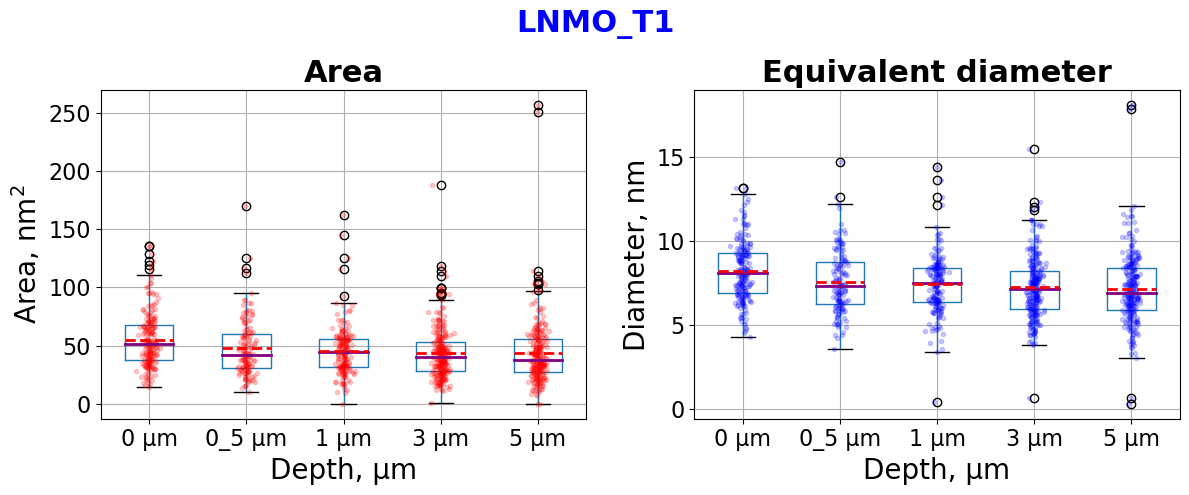

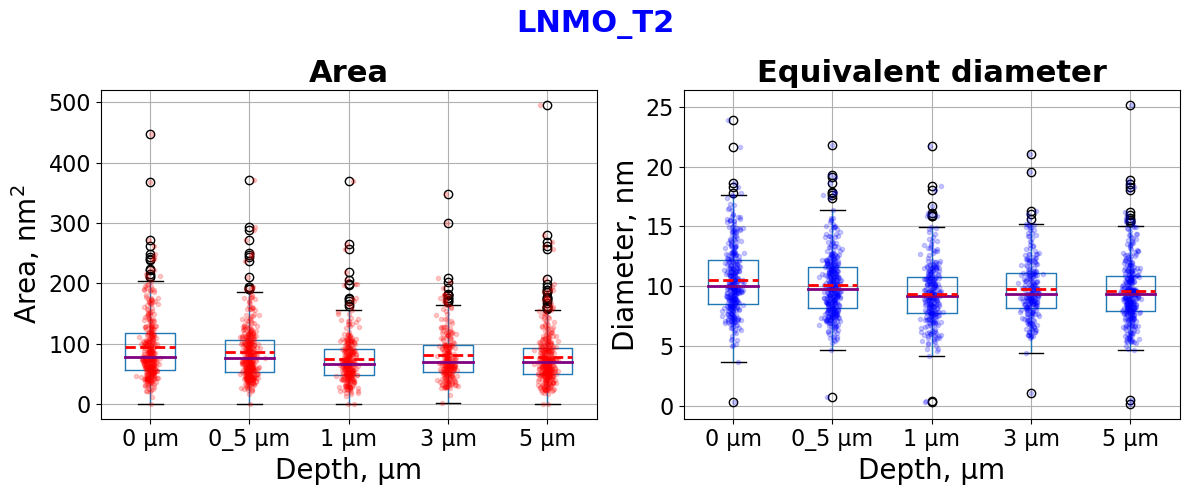

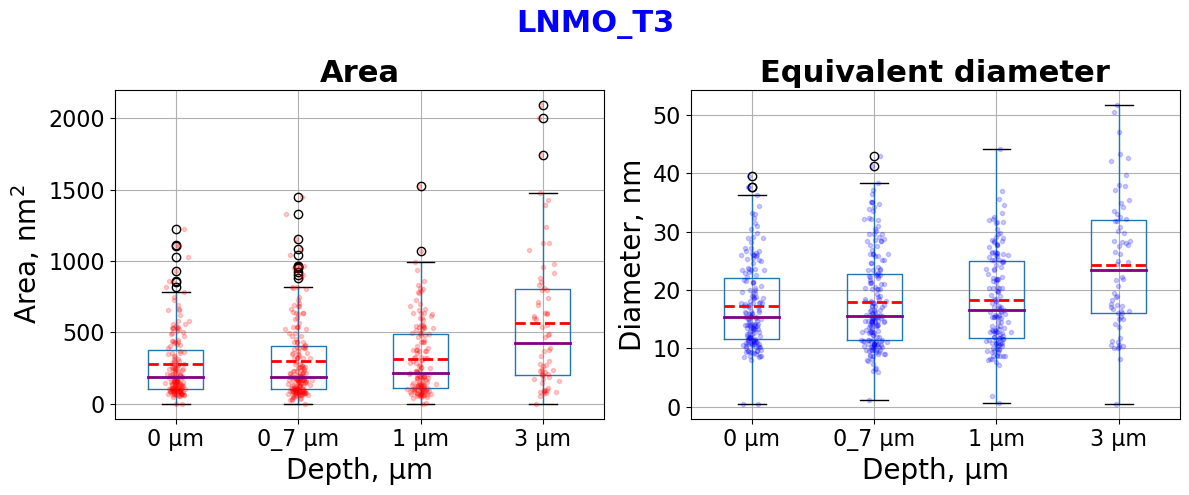

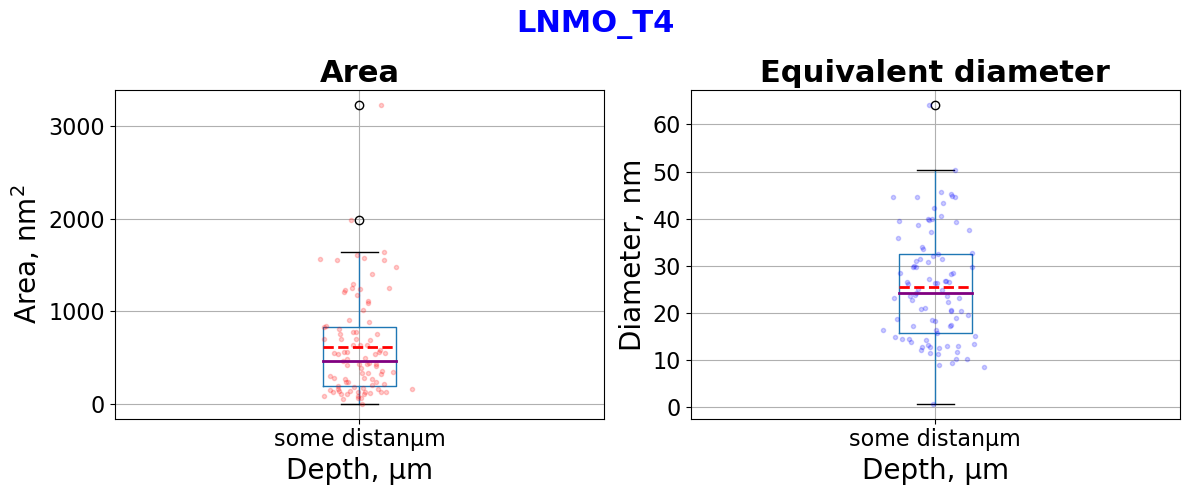

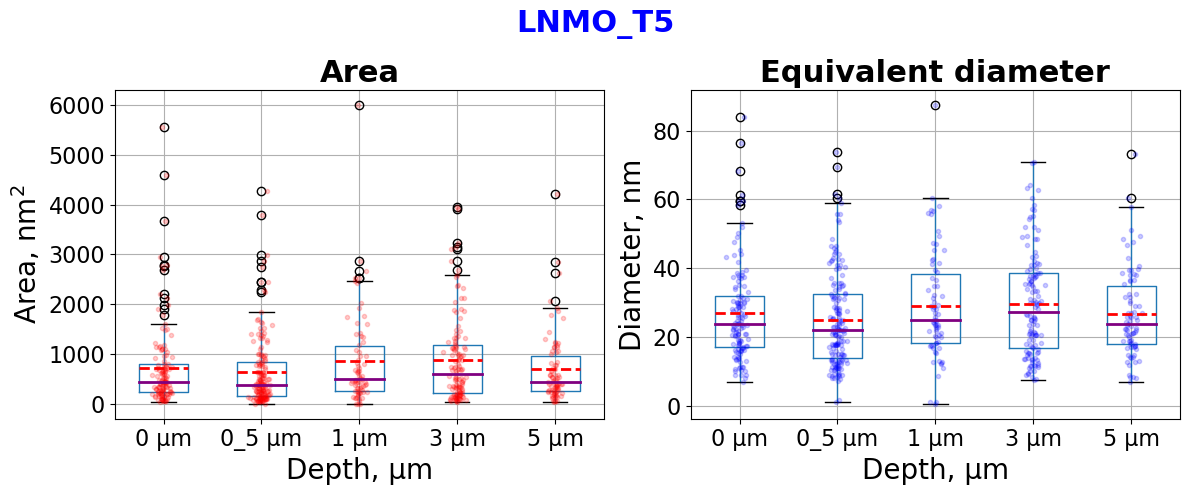

In [13]:
for k, folder in enumerate(df_dict_folder.keys()):
    # boxplot
    fig, ax = plt.subplots(1, 2, 
                            figsize=(12, 5), 
                            # dpi=600
                            )
    # make fig title
    fig.suptitle(folder, fontsize=22, fontweight='bold', color='Blue')
    # Make box plot for Area columns
    df_dict_folder[folder].iloc[:, ::2].boxplot(ax=ax[0],
                                                showmeans=True,
                                                meanline=True,
                                                meanprops={'color': 'red', 'linewidth': 2},
                                                medianprops={'color': 'purple','linewidth': 2},
                                                )

    ax[0].set_title('Area', fontsize=22, fontweight='bold')
    ax[0].set_ylabel('Area, $\\mathrm{nm}^2$', fontsize=20)
    ax[0].set_xlabel('Depth, µm', fontsize=20)
    ax[0].tick_params(axis='both', which='major', labelsize=16)
    # change xticklabels
    xticklabels = [item.get_text() for item in ax[0].get_xticklabels()]
    # xticklabels = [xticklabel[:-2] for xticklabel in xticklabels]
    xticklabels = [xticklabel[:-4]+'µm' for xticklabel in xticklabels]
    ax[0].set_xticklabels(xticklabels)
    # add overlayt with actual data
    for i in range(len(list(df_dict_folder[folder].iloc[:, ::2].columns))):
        y = df_dict_folder[folder].iloc[:, ::2].iloc[:, i]
        x = np.random.normal(i+1, 0.04, size=len(y))
        ax[0].plot(x, y, 'r.', alpha=0.2)


    # Make box plot for Diameter columns
    df_dict_folder[folder].iloc[:, 1::2].boxplot(ax=ax[1],
                                                showmeans=True,
                                                meanline=True,
                                                meanprops={'color': 'red', 'linewidth': 2},
                                                medianprops={'color': 'purple','linewidth': 2},
                                                )
    ax[1].set_title('Equivalent diameter', fontsize=22, fontweight='bold')
    ax[1].set_ylabel('Diameter, nm', fontsize=20)
    ax[1].set_xlabel('Depth, µm', fontsize=20)
    ax[1].tick_params(axis='both', which='major', labelsize=16)
    # change xticklabels
    xticklabels = [item.get_text() for item in ax[1].get_xticklabels()]
    xticklabels = [xticklabel[:-4]+'µm' for xticklabel in xticklabels]
    ax[1].set_xticklabels(xticklabels)
    # add overlayt with actual data
    for i in range(len(list(df_dict_folder[folder].iloc[:, 1::2].columns))):
        y = df_dict_folder[folder].iloc[:, 1::2].iloc[:, i]
        x = np.random.normal(i+1, 0.04, size=len(y))
        ax[1].plot(x, y, 'b.', alpha=0.2)
    fig.tight_layout()

    plt.savefig(path_to_save_big_plots + folder + '_boxplots.png', dpi=300)
    plt.show()

### This code performs the following tasks:

1. Iterates over each folder in `df_dict_folder`.
2. Creates a figure with two subplots for each folder.
3. Sets the figure title to the folder name.
4. Generates a bar plot for the 'Area' columns in the first subplot:
   - Plots the mean values with error bars representing the standard deviation.
   - Sets titles and labels for the axes.
   - Adjusts tick labels to show depth in micrometers and sets them to horizontal orientation.
5. Generates a bar plot for the 'Diameter' columns in the second subplot:
   - Plots the mean values with error bars representing the standard deviation.
   - Sets titles and labels for the axes.
   - Adjusts tick labels to show depth in micrometers and sets them to horizontal orientation.
6. Adjusts the layout of the figure.
7. Saves the figure as a PNG file in the specified path.
8. Displays the figure.

This code is useful for visualizing the mean values and variability (standard deviation) of domain areas and equivalent diameters at different depths within each folder.

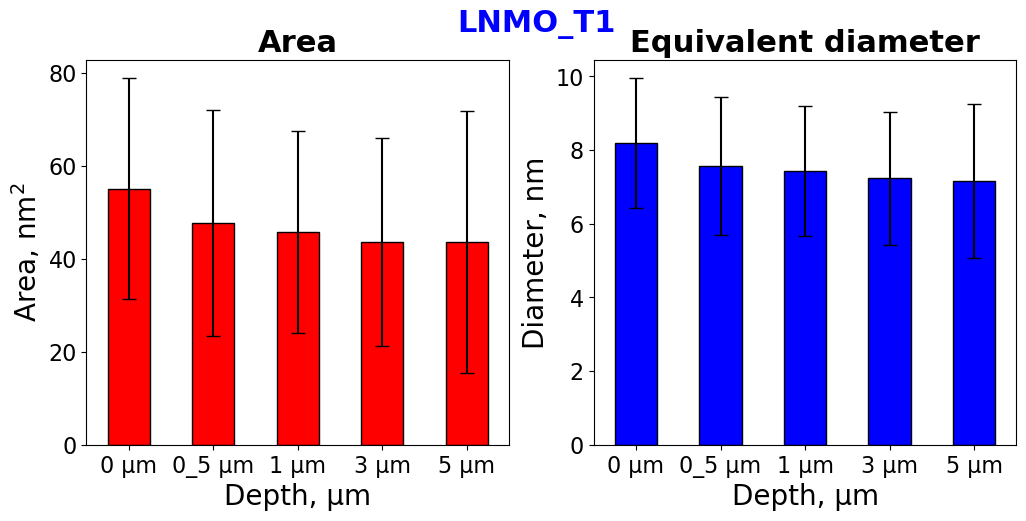

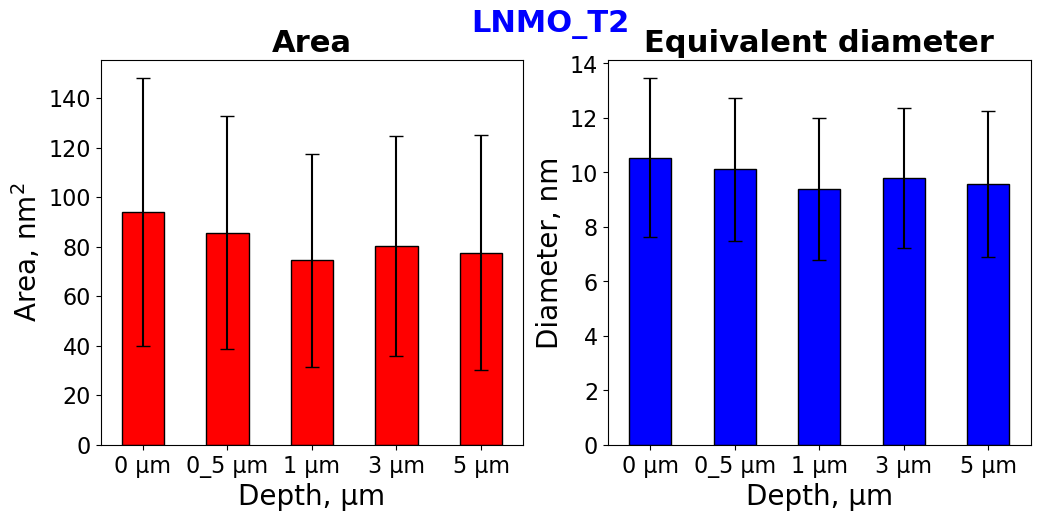

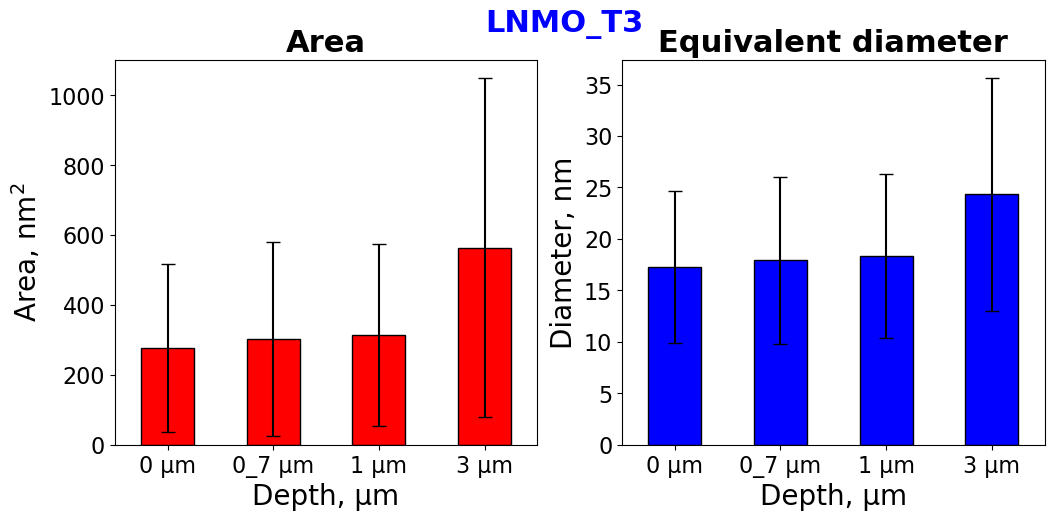

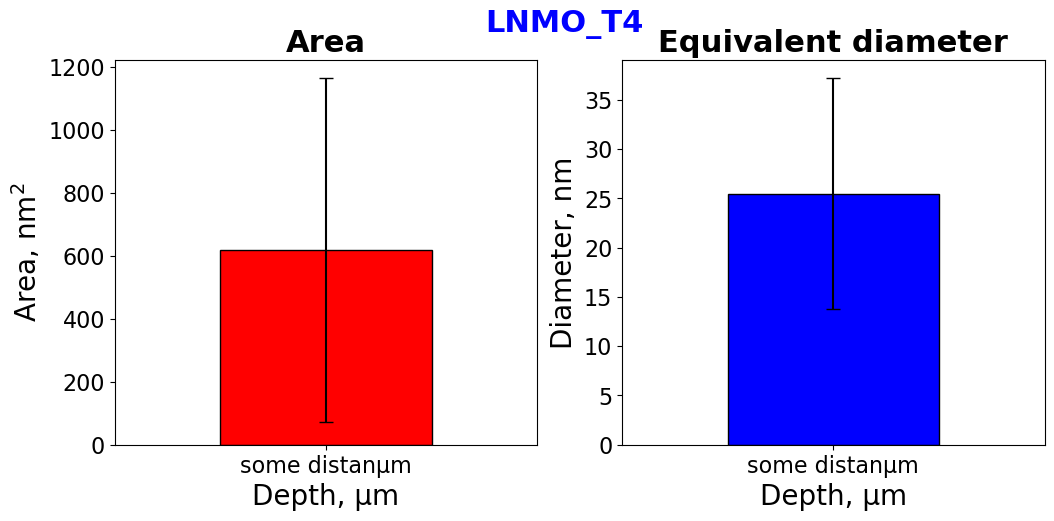

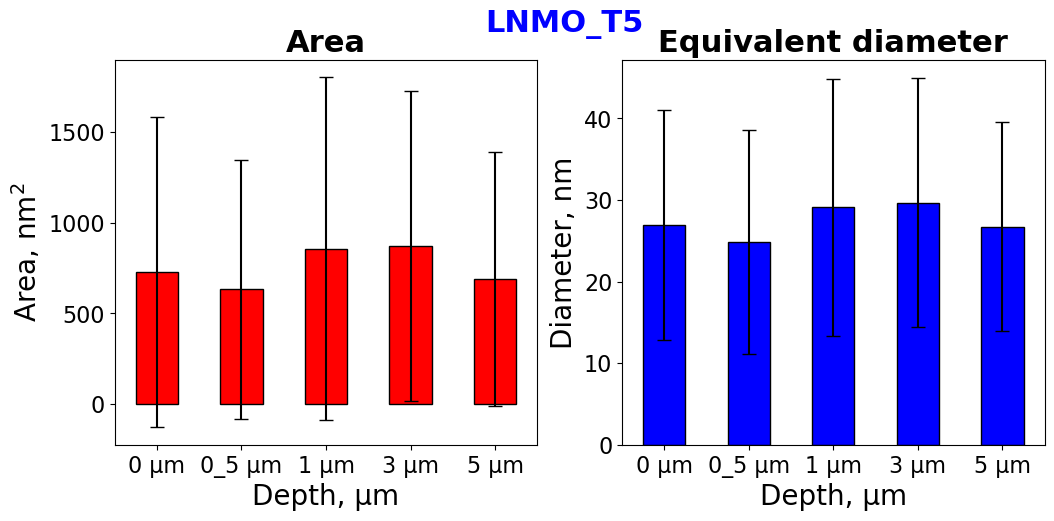

In [14]:
for k, folder in enumerate(df_dict_folder.keys()):
    # bar plot
    fig, ax = plt.subplots(1, 2, 
                            figsize=(12, 5), 
                            # dpi=600
                            )
    # make fig title
    fig.suptitle(folder, fontsize=22, fontweight='bold', color='Blue')
    # Make bar plot for Area columns
    df_dict_folder[folder].iloc[:, ::2].mean().plot.bar(ax=ax[0],
                                                        yerr=df_dict_folder[folder].iloc[:, ::2].std(),
                                                        capsize=5,
                                                        color='red',
                                                        edgecolor='black'  # Set the edgecolor to black
                                                        )
    ax[0].set_title('Area', fontsize=22, fontweight='bold')
    ax[0].set_ylabel('Area, $\\mathrm{nm}^2$', fontsize=20)
    ax[0].set_xlabel('Depth, µm', fontsize=20)
    ax[0].tick_params(axis='both', which='major', labelsize=16)
    # change xticklabels
    xticklabels = [item.get_text() for item in ax[0].get_xticklabels()]
    # xticklabels = [xticklabel[:-2] for xticklabel in xticklabels]
    xticklabels = [xticklabel[:-4]+'µm' for xticklabel in xticklabels]
    ax[0].set_xticklabels(xticklabels)
    # make tick label horizontal
    for tick in ax[0].get_xticklabels():
        tick.set_rotation(0)


    # Make bar plot for Diameter columns
    df_dict_folder[folder].iloc[:, 1::2].mean().plot.bar(ax=ax[1],
                                                        yerr=df_dict_folder[folder].iloc[:, 1::2].std(),
                                                        capsize=5,
                                                        color='blue',
                                                        edgecolor='black'  # Set the edgecolor to black
                                                        )
    ax[1].set_title('Equivalent diameter', fontsize=22, fontweight='bold')
    ax[1].set_ylabel('Diameter, nm', fontsize=20)
    ax[1].set_xlabel('Depth, µm', fontsize=20)
    ax[1].tick_params(axis='both', which='major', labelsize=16)
    # change xticklabels
    xticklabels = [item.get_text() for item in ax[1].get_xticklabels()]
    xticklabels = [xticklabel[:-4]+'µm' for xticklabel in xticklabels]
    ax[1].set_xticklabels(xticklabels)
    for tick in ax[1].get_xticklabels():
        tick.set_rotation(0)
    fig.tight_layout
    #save figure
    plt.savefig(path_to_save_big_plots + folder + '_barplots.png', dpi=300)
    plt.show()

### This code performs the following tasks:

1. Iterates over each folder in `df_dict_folder`.
2. Creates a figure with two subplots for each folder.
3. Sets the figure title to the folder name.
4. Generates a bar plot for the 'Area' columns in the first subplot:
   - Plots the mean values with error bars representing the standard deviation.
   - Sets titles and labels for the axes.
   - Adjusts tick labels to show depth in micrometers and sets them to horizontal orientation.
5. Generates a bar plot for the 'Diameter' columns in the second subplot:
   - Plots the mean values with error bars representing the standard deviation.
   - Sets titles and labels for the axes.
   - Adjusts tick labels to show depth in micrometers and sets them to horizontal orientation.
6. Adjusts the layout of the figure.
7. Saves the figure as a PNG file in the specified path.
8. Displays the figure.

This code is useful for visualizing the mean values and variability (standard deviation) of domain areas and equivalent diameters at different depths within each folder.

In [17]:
sturges = lambda n: int(np.log2(n) + 1)
square_root = lambda n: int(np.sqrt(n))
from scipy.stats import kurtosis
doanes = lambda data: int(1 + np.log(len(data)) + np.log(1 + kurtosis(data) * (len(data) / 6.) ** 0.5))

n = len(df_dict_folder['LNMO_T5']['0 um_A'].dropna())
sturges(n), square_root(n), doanes(df_dict_folder['LNMO_T5']['0 um_A'].dropna())

(8, 11, 9)

### This code performs the following tasks:

1. Sets a flag to determine whether to limit the x-axis range.
2. Iterates over each folder in `df_dict_folder`.
3. Prints the folder name.
4. Creates a figure with multiple subplots for each folder.
5. Sets the figure title to the folder name.
6. Generates histograms and KDE plots for 'Area' and 'Equivalent diameter' columns:
   - Decides the number of bins based on the kurtosis of the data.
   - Plots histograms with density normalization and KDE plots.
   - Sets titles, labels, and tick parameters for the axes.
   - Optionally limits the x-axis range.
   - Adds vertical lines for mean, median, and mode.
   - Adds text annotations for mean, median, mode, and standard deviation.
   - Adds legends for the vertical lines.
7. Adjusts the layout of the figure.
8. Saves the figure as a PNG file in the specified path, with or without x-axis limits.
9. Displays the figure.

This code is useful for visualizing the distribution and density of domain areas and equivalent diameters at different depths within each folder.

-----------------------

Folder: LNMO_T1

Area kurt < 0, use Sturges, bins = 8
Area kurt < 0, use Sturges, bins = 8
Area kurt < 0, use Sturges, bins = 9
Area kurt < 0, use Sturges, bins = 10
Area kurt < 0, use Sturges, bins = 11


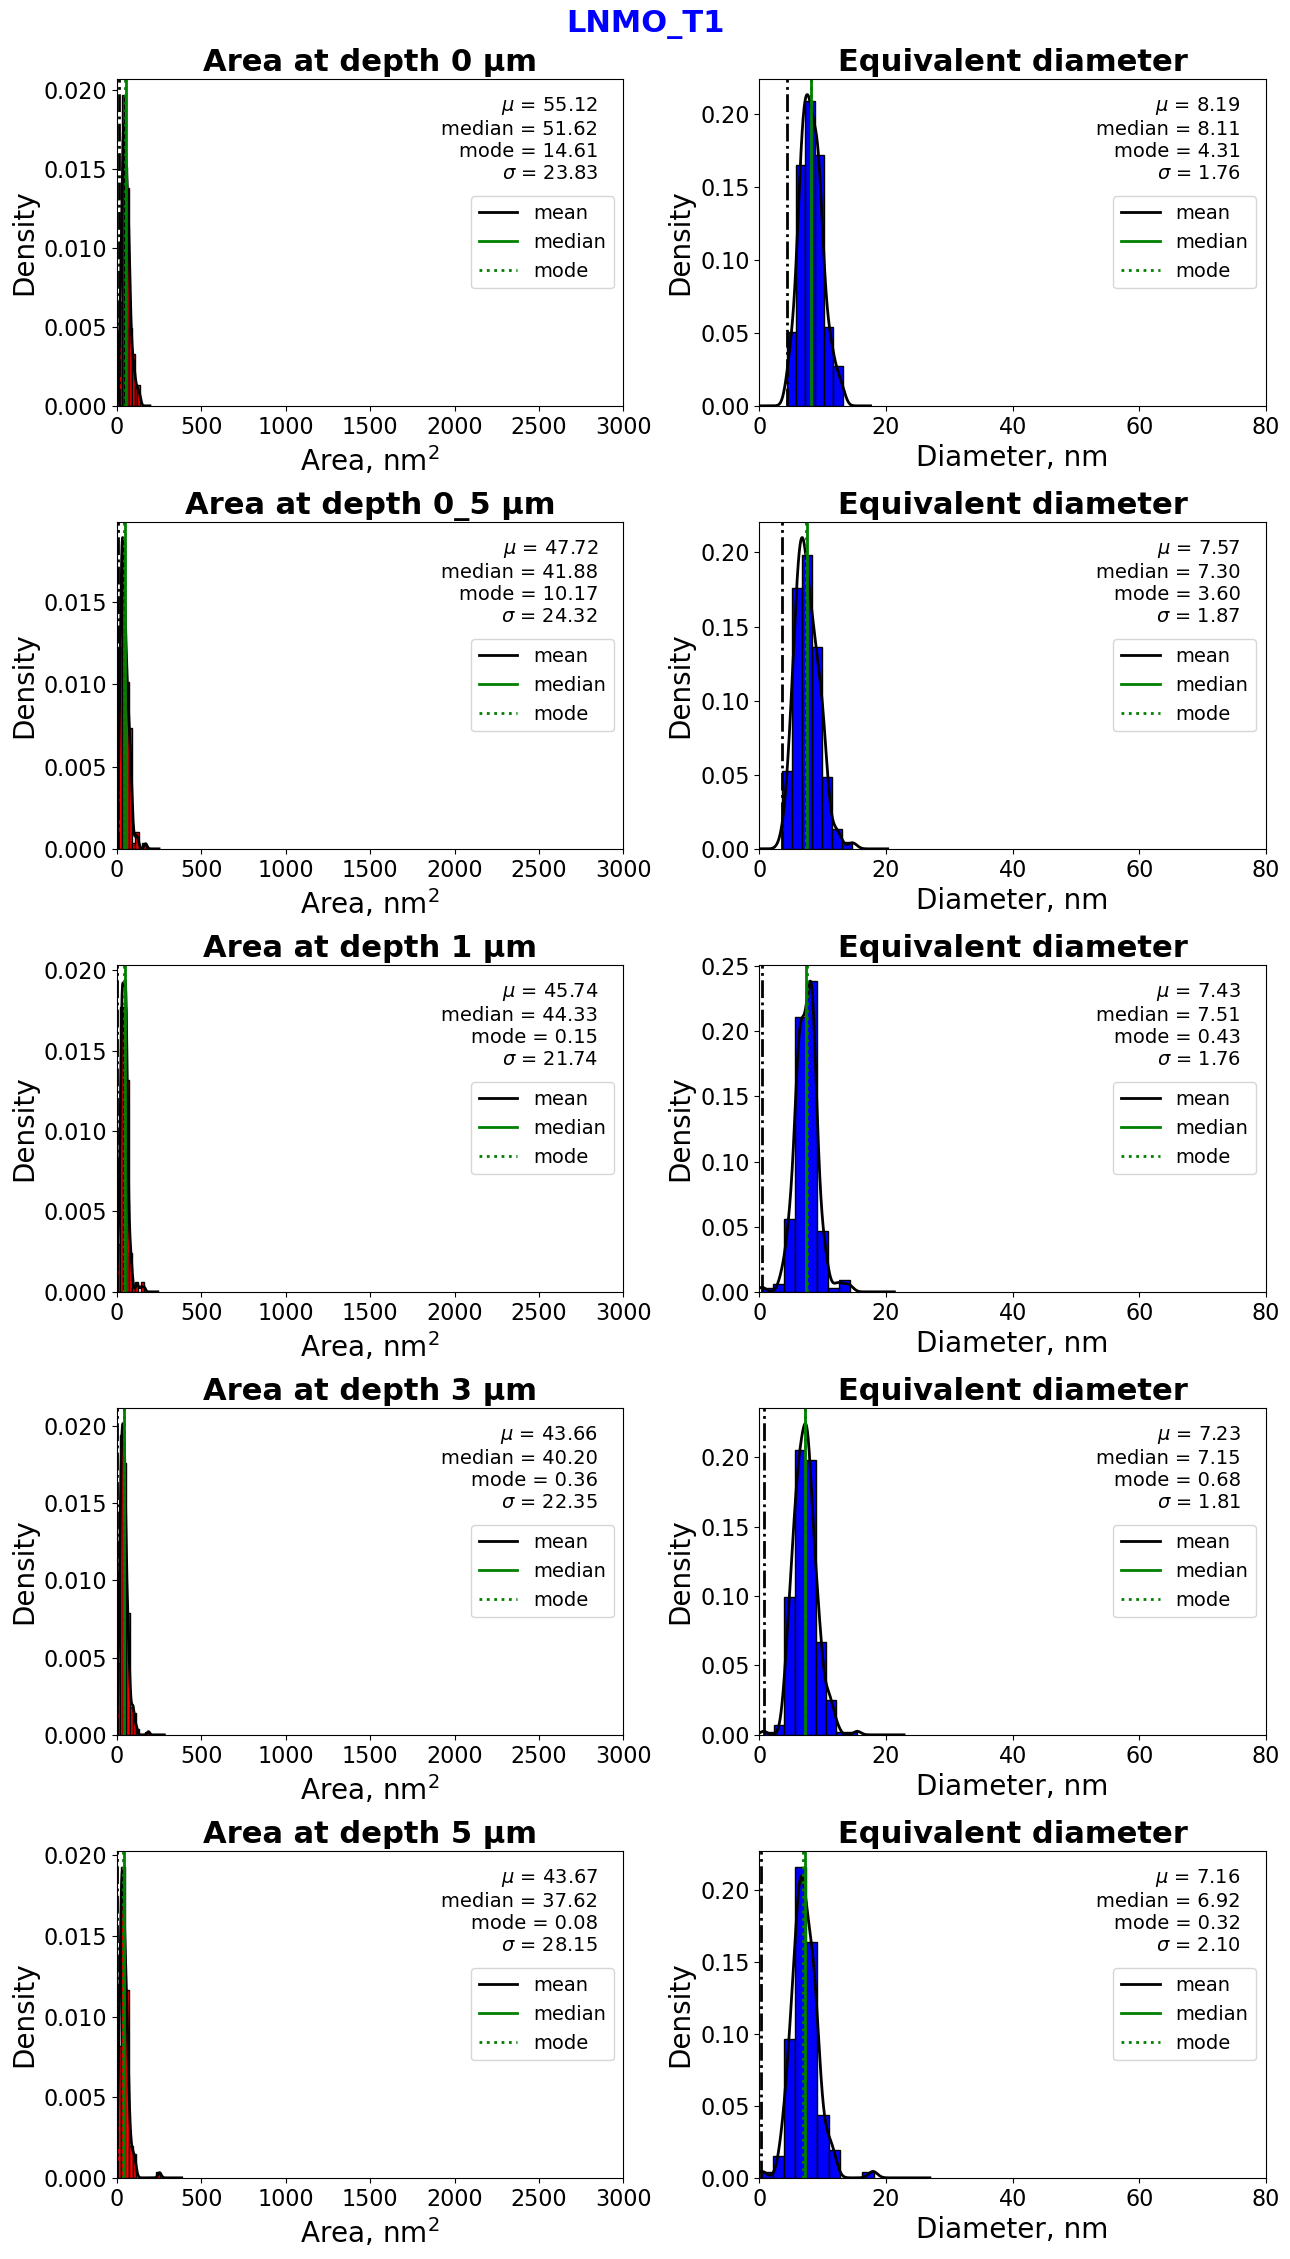

-----------------------

Folder: LNMO_T2

Area kurt < 0, use Sturges, bins = 10
Area kurt < 0, use Sturges, bins = 10
Area kurt < 0, use Sturges, bins = 10
Area kurt < 0, use Sturges, bins = 10
Area kurt < 0, use Sturges, bins = 11


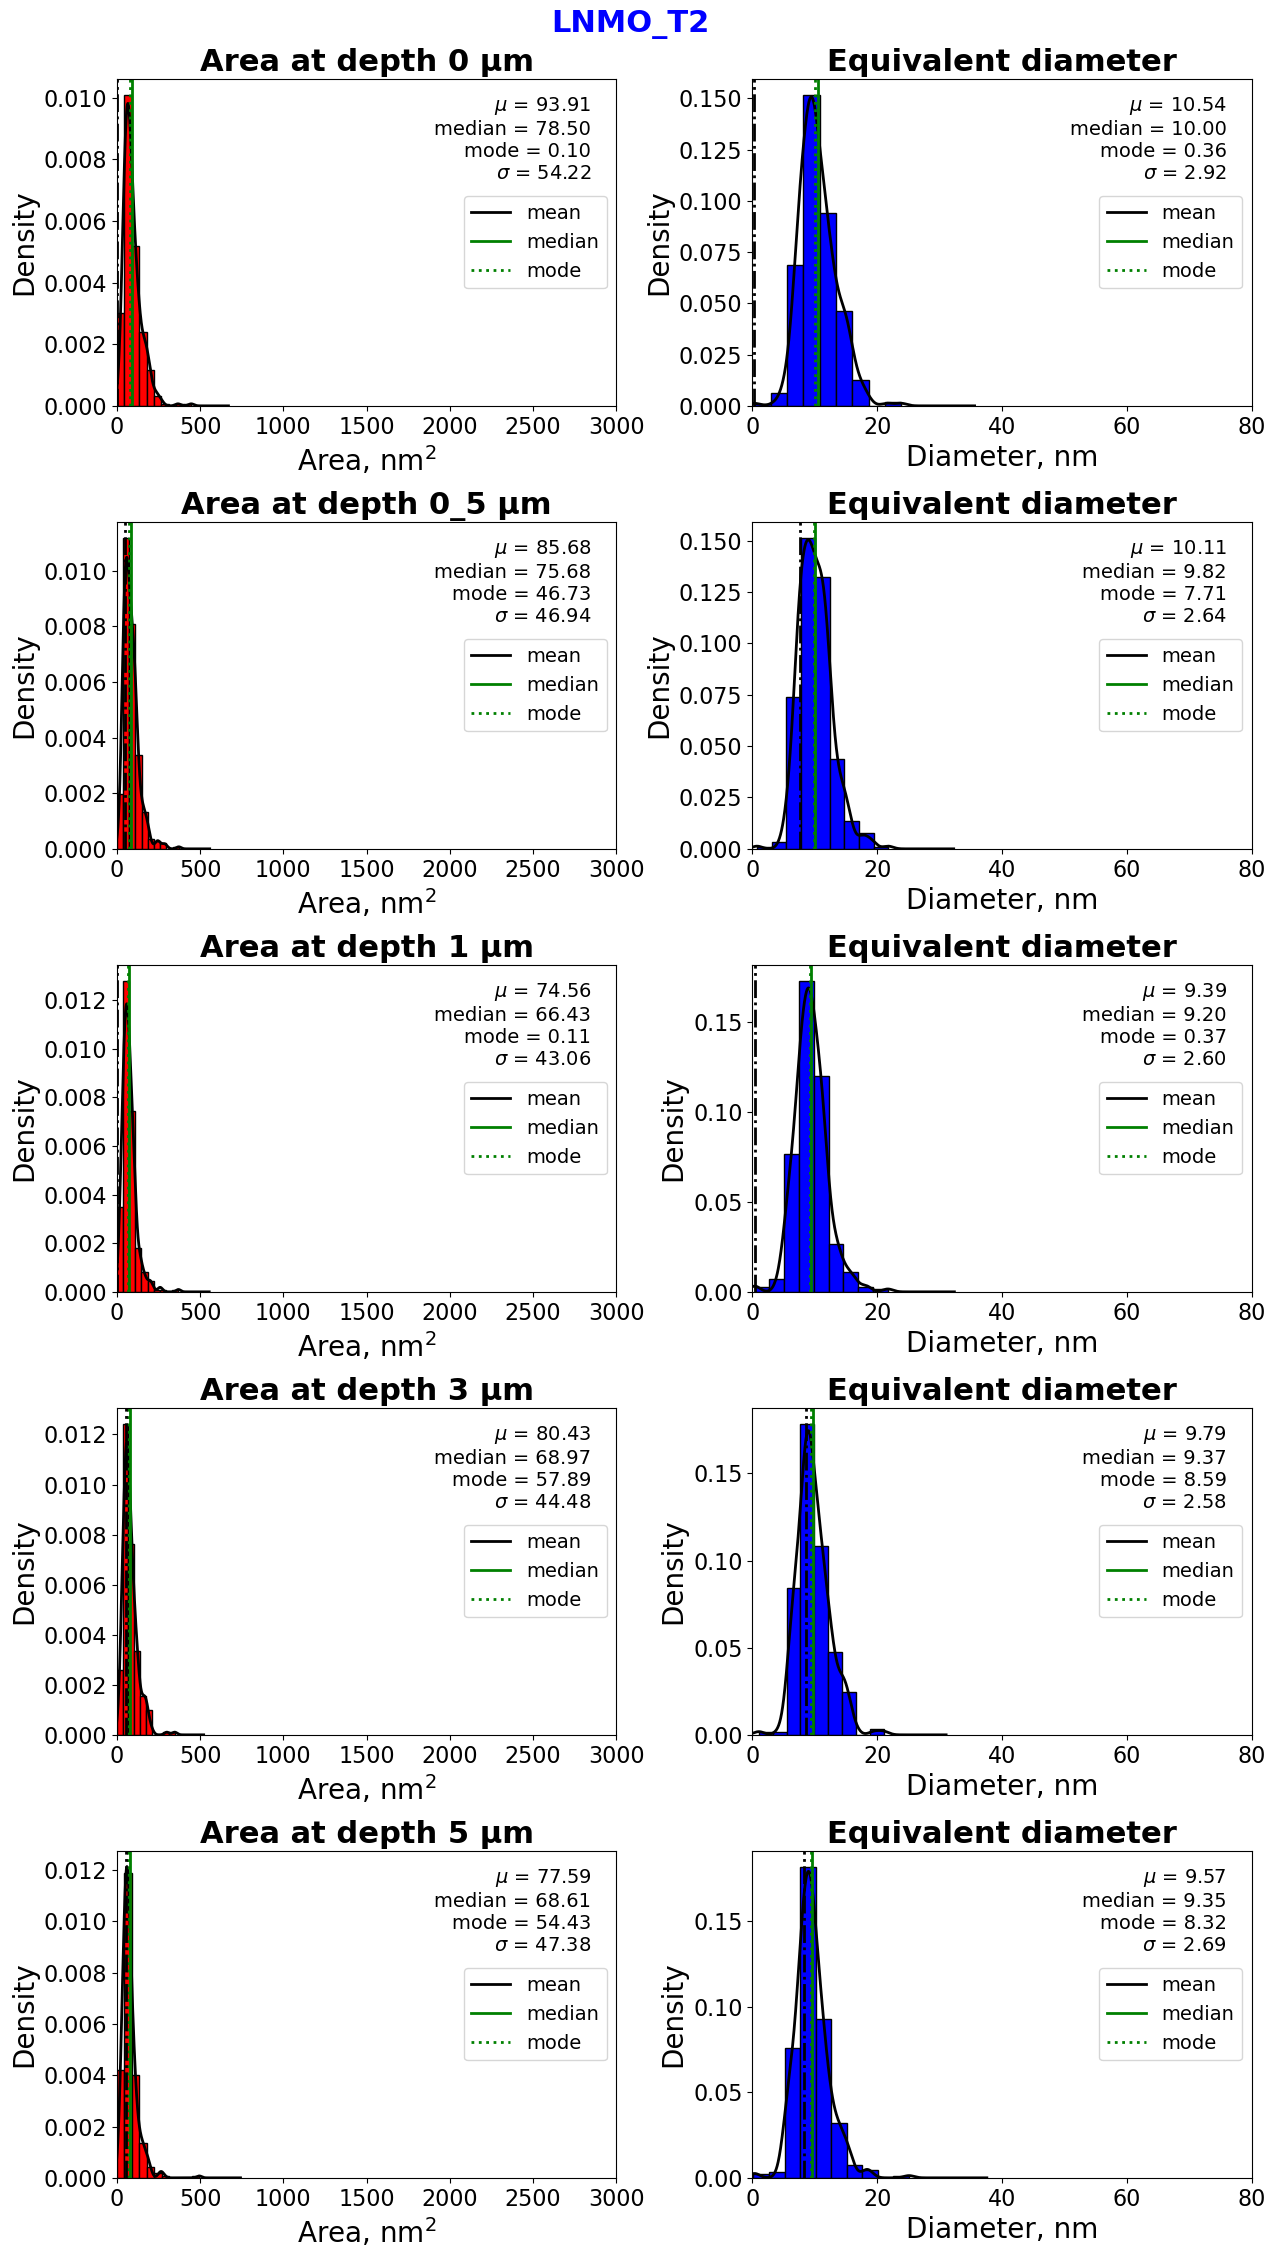

-----------------------

Folder: LNMO_T3

Area kurt < 0, use Sturges, bins = 8
Area kurt < 0, use Sturges, bins = 8
Area kurt < 0, use Sturges, bins = 8
Diameter kurt < 0, use Sturges, bins = 8
Area kurt < 0, use Sturges, bins = 6
Diameter kurt < 0, use Sturges, bins = 7


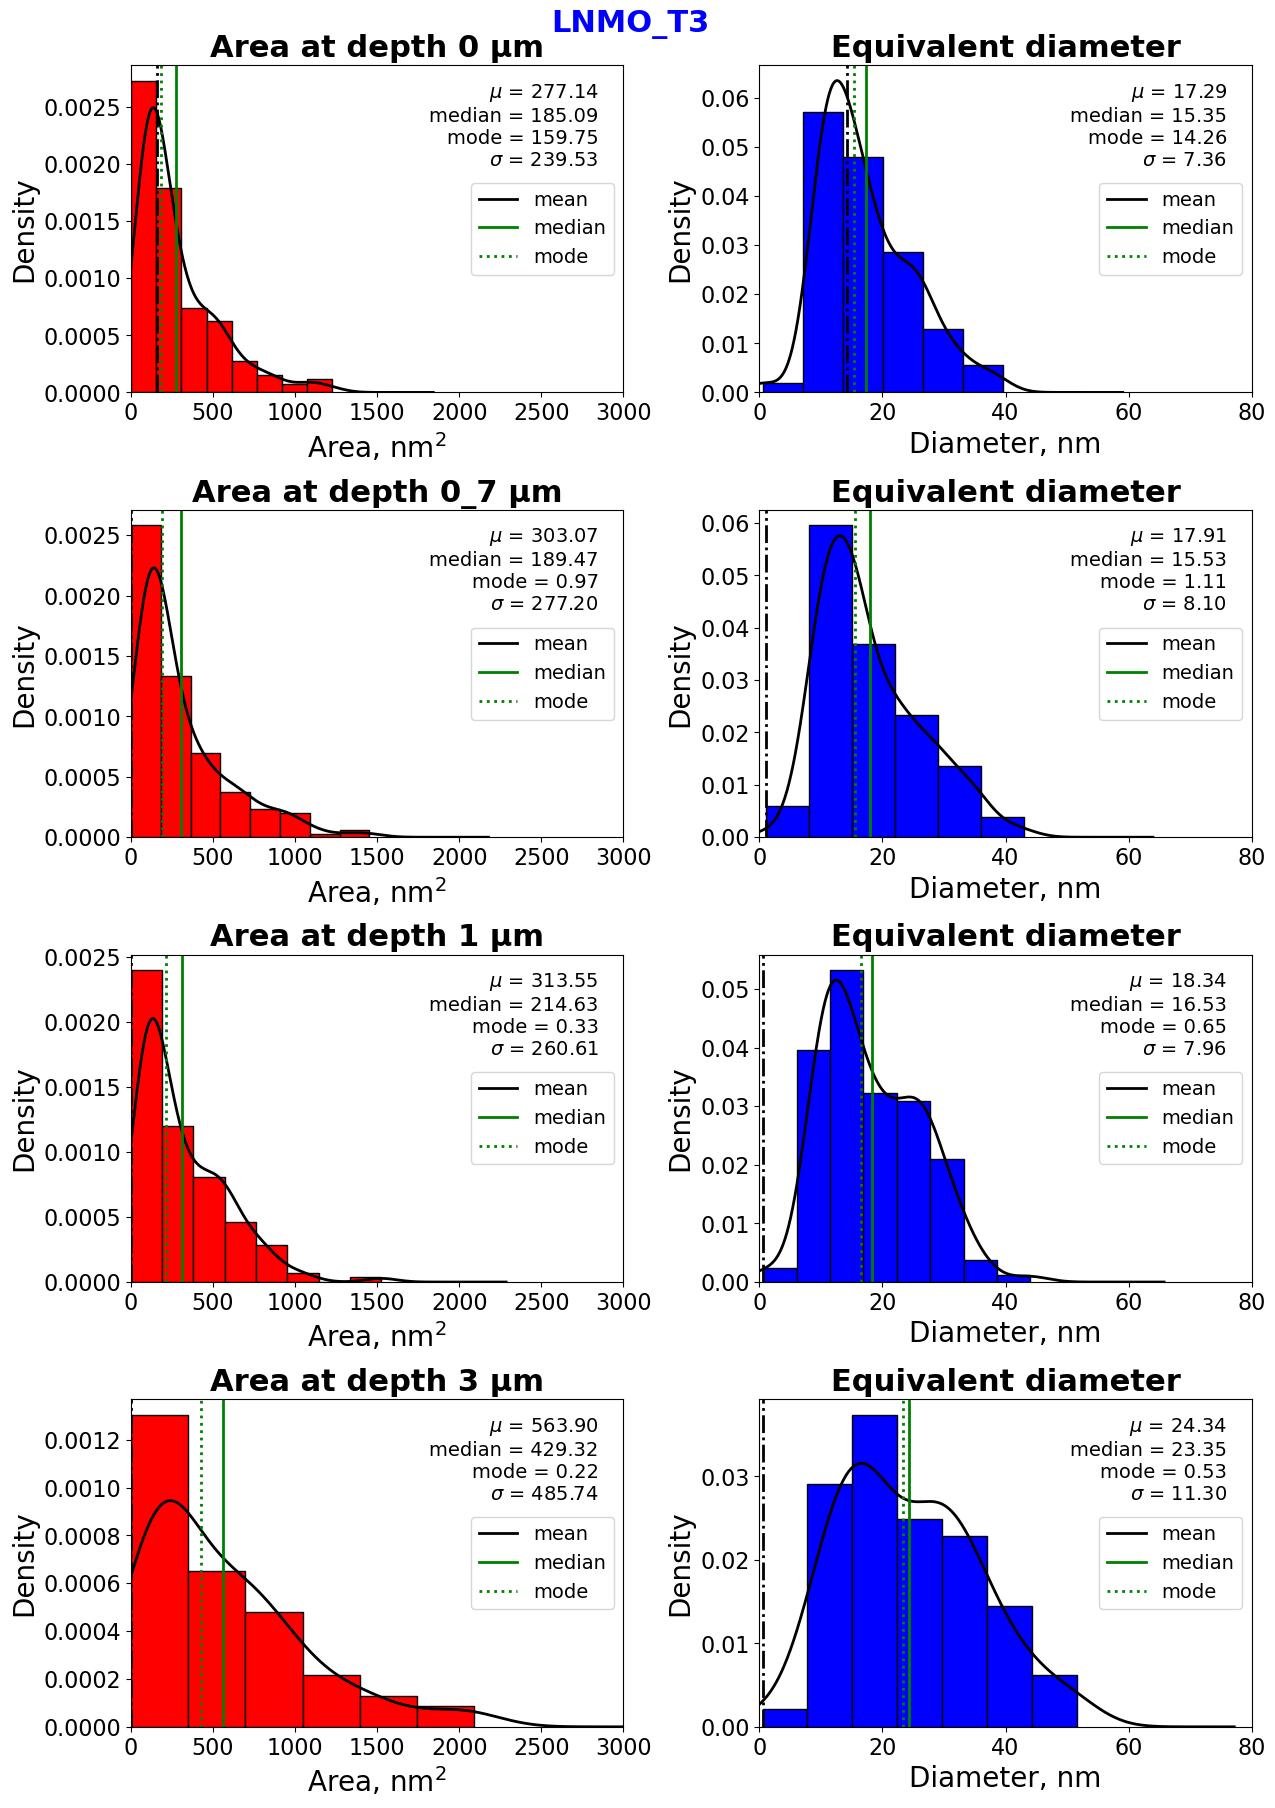

-----------------------

Folder: LNMO_T4

Area kurt < 0, use Sturges, bins = 8


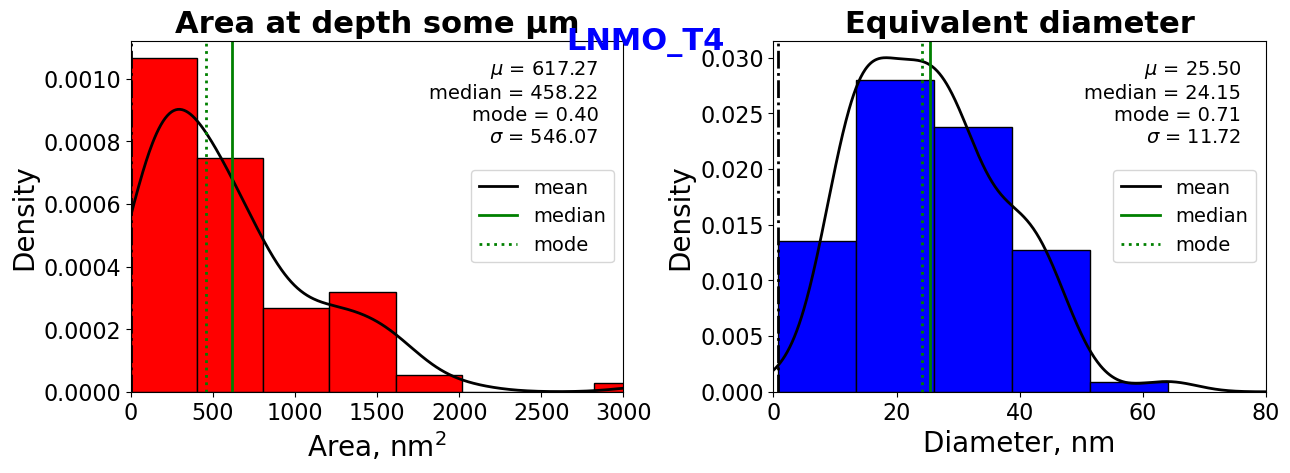

-----------------------

Folder: LNMO_T5

Area kurt < 0, use Sturges, bins = 9
Area kurt < 0, use Sturges, bins = 9
Area kurt < 0, use Sturges, bins = 8
Area kurt < 0, use Sturges, bins = 8
Diameter kurt < 0, use Sturges, bins = 8
Area kurt < 0, use Sturges, bins = 8


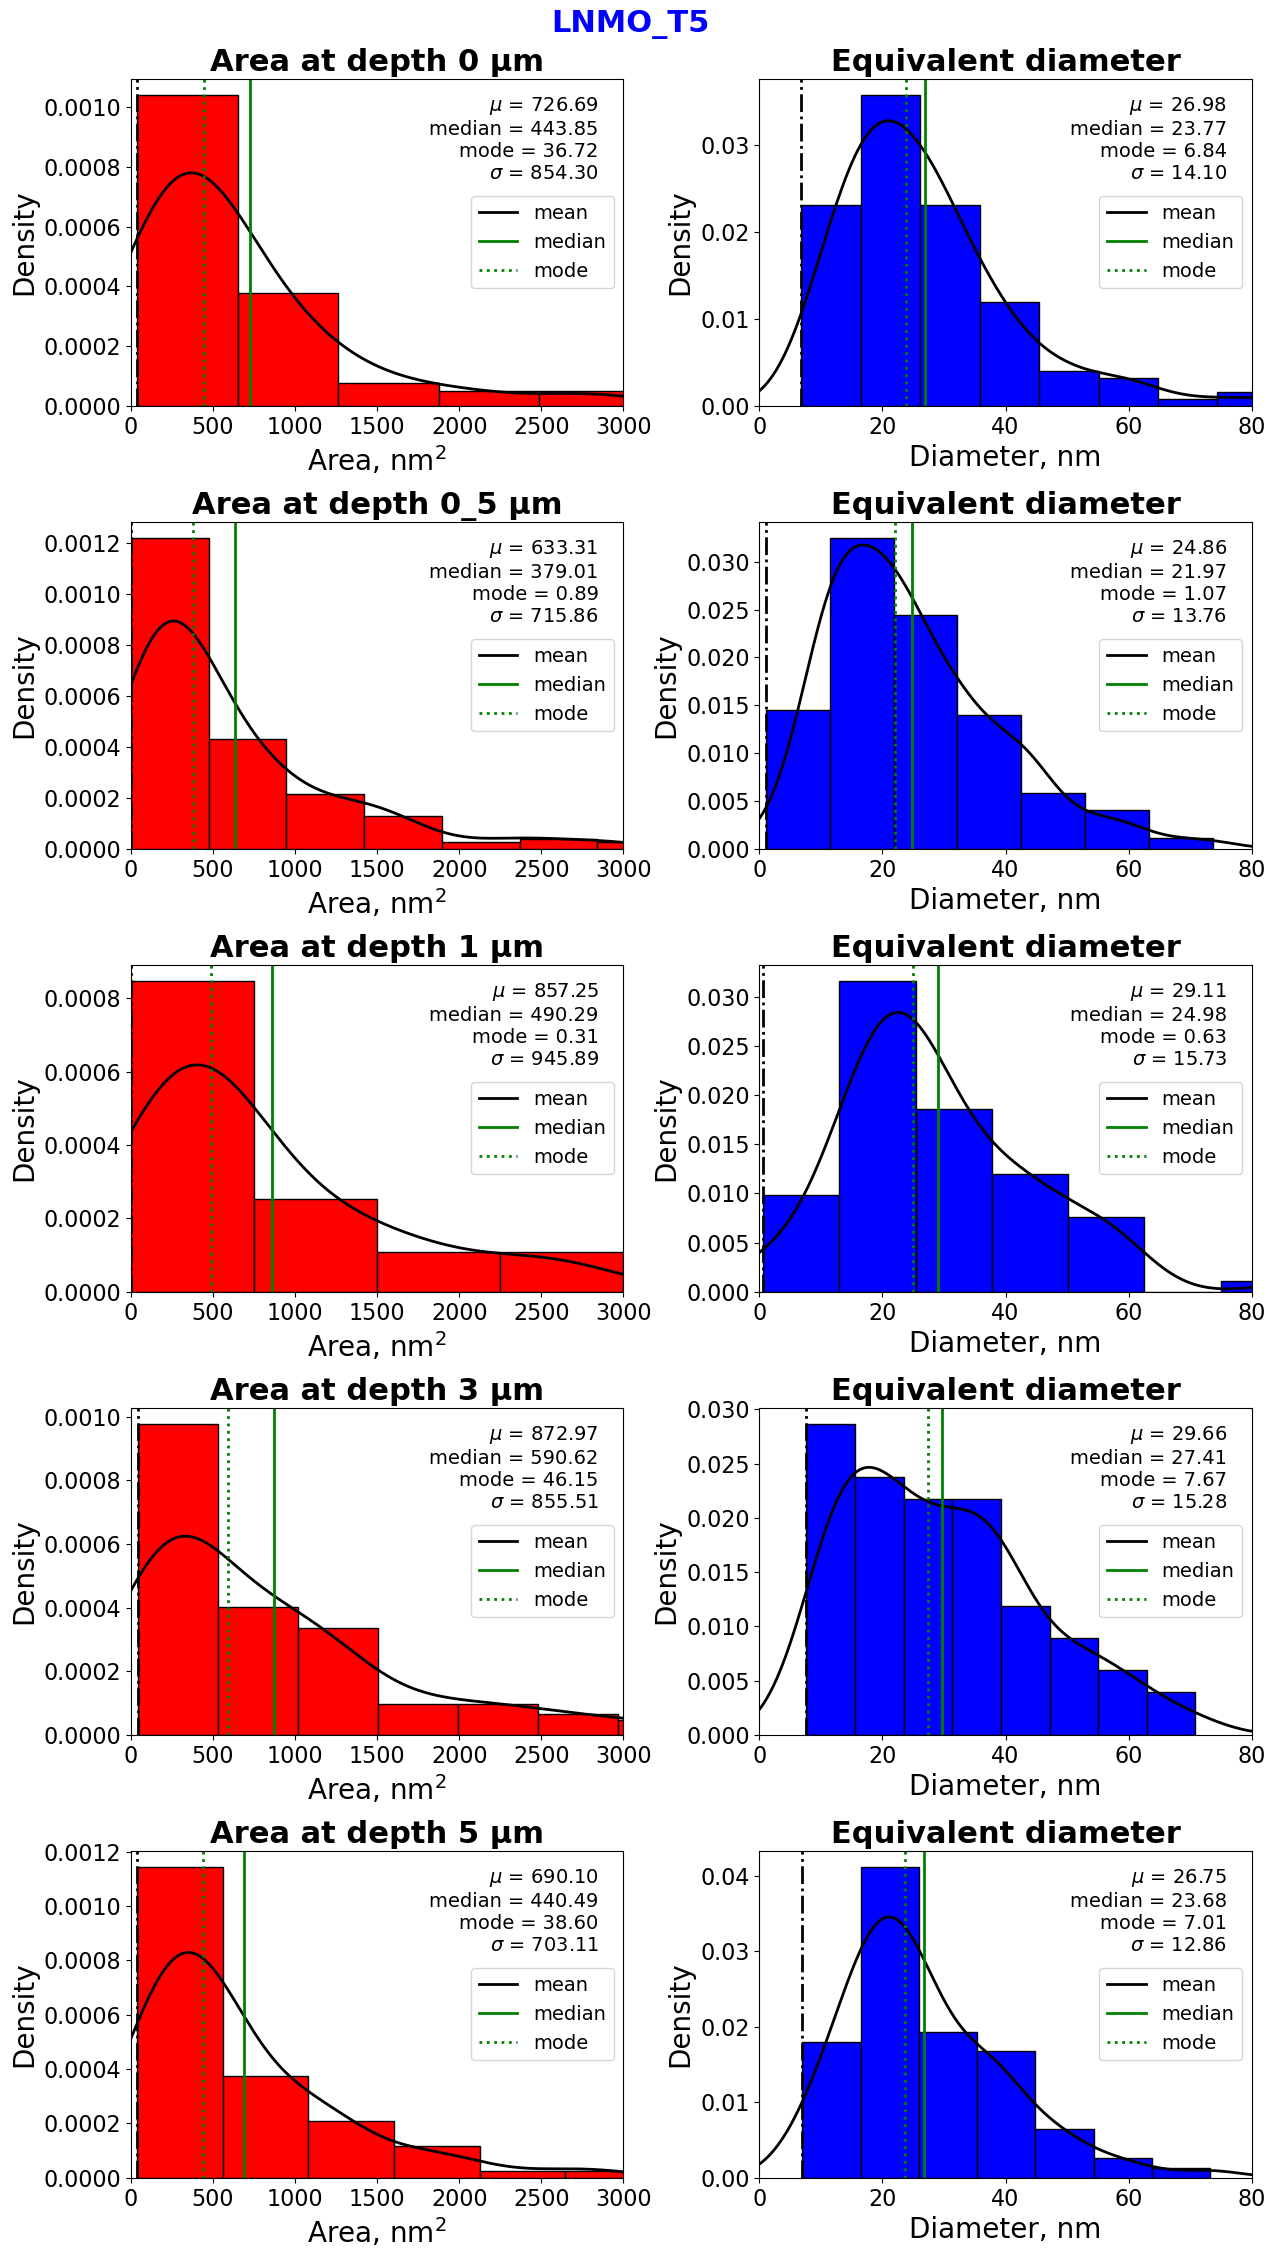

In [18]:

#* Set the x axis limit to True or False
x_axis_limit = True

for k, folder in enumerate(df_dict_folder.keys()):
    print(f'-----------------------\n')
    print(f'Folder: {folder}\n')
    # number pf plot columns
    nrow = df_dict_folder[folder].shape[1]
    nrows = int(nrow/2)
    # histogram
    fig, ax = plt.subplots(nrows=nrows, 
                            ncols=2, 
                            figsize=(13, 4.6*nrows),
                            # dpi=600
                            )
    # make fig title
    fig.suptitle(folder, fontsize=22, fontweight='bold', color='Blue')
    ax = ax.flatten()
    # Make histograms
    for i in range(nrows):
        # name of the column
        col_name = df_dict_folder[folder].columns[2*i]
        depth = ' at depth '+col_name.split(' ')[0]+' µm'
        # decide on number of bins
        data_colum_even = df_dict_folder[folder].iloc[:, 2*i].dropna() 
        n = len(data_colum_even)
        kurt = kurtosis(data_colum_even) * (len(data_colum_even) / 6.) ** 0.5
        if kurt > 0:
            bins = doanes(data_colum_even)
            print(f'Area kurt < 0, use Sturges, bins = {bins}')
        else:
            bins = sturges(n)
            # bins = square_root(n)
        # bins = doanes(df_dict_folder[folder].iloc[:, 2*i].dropna())
        # Make histogram for Area columns
        df_dict_folder[folder].iloc[:, 2*i].hist(ax=ax[2*i],
                                                # bins=50,
                                                bins=bins,
                                                color='red',
                                                edgecolor='black',  # Set the edgecolor to black
                                                grid=False, 
                                                density=True
                                                )
        # add KDE plot
        df_dict_folder[folder].iloc[:, 2*i].plot.kde(ax=ax[2*i],
                                                    color='black',
                                                    linewidth=2,
                                                    )
        ax[2*i].set_title('Area'+depth, fontsize=22, fontweight='bold')
        ax[2*i].set_ylabel('Density', fontsize=20)
        ax[2*i].set_xlabel('Area, $\\mathrm{nm}^2$', fontsize=20)
        ax[2*i].tick_params(axis='both', which='major', labelsize=16)
        if x_axis_limit:
            ax[2*i].set_xlim(0, 3000)
        # ax[2*i].set_xlim(0, 3000)
        # calculate column mean and std
        mean = df_dict_folder[folder].iloc[:, 2*i].mean()
        std = df_dict_folder[folder].iloc[:, 2*i].std()
        # meadian
        median = df_dict_folder[folder].iloc[:, 2*i].median()
        # mode
        mode = df_dict_folder[folder].iloc[:, 2*i].mode().iloc[0]
        # add vertical lines
        ax[2*i].axvline(mean, color='green', linestyle='solid', linewidth=2)
        # ax[2*i].axvline(mean+std, color='black', linestyle='dashed', linewidth=2)
        # ax[2*i].axvline(mean-std, color='black', linestyle='dashed', linewidth=2)
        ax[2*i].axvline(median, color='green', linestyle='dotted', linewidth=2)
        ax[2*i].axvline(mode, color='black', linestyle='dashdot', linewidth=2)
        # add text
        ax[2*i].text(0.95, 0.95, f'$\\mu$ = {mean:.2f}\nmedian = {median:.2f}\nmode = {mode:.2f}\n$\\sigma$ = {std:.2f}',
                    verticalalignment='top', 
                    horizontalalignment='right',
                    transform=ax[2*i].transAxes,
                    color='black', fontsize=14)
        # add legend for lines
        ax[2*i].legend(['mean', 
                        # 'mean+std', 
                        # 'mean-std', 
                        'median', 
                        'mode'
                        ], fontsize=14, loc='center right')


        
        # decide on number of bins
        
        data_colum_even = df_dict_folder[folder].iloc[:, 2*i+1].dropna() 
        n = len(data_colum_even)
        kurt = kurtosis(data_colum_even) * (len(data_colum_even) / 6.) ** 0.5
        if kurt > 0:
            bins = doanes(data_colum_even)
        else:
            bins = sturges(n)
            print(f'Diameter kurt < 0, use Sturges, bins = {bins}')
        
        # n = len(df_dict_folder[folder].iloc[:, 2*i+1].dropna())
        # df_t = df_dict_folder[folder].iloc[:, 2*i+1].dropna()
        # bins = doanes(df_t)


        # Make histogram for Diameter columns
        df_dict_folder[folder].iloc[:, 2*i+1].hist(ax=ax[2*i+1],
                                                # bins=50,
                                                bins=bins,
                                                color='blue',
                                                edgecolor='black',  # Set the edgecolor to black
                                                grid=False,
                                                density=True
                                                )                                             
        # add KDE plot
        df_dict_folder[folder].iloc[:, 2*i+1].plot.kde(ax=ax[2*i+1],
                                                    color='black',
                                                    linewidth=2,
                                                    )
        ax[2*i+1].set_title('Equivalent diameter', fontsize=22, fontweight='bold')
        ax[2*i+1].set_ylabel('Density', fontsize=20)
        ax[2*i+1].set_xlabel('Diameter, nm', fontsize=20)
        ax[2*i+1].tick_params(axis='both', which='major', labelsize=16)
        if x_axis_limit:
            ax[2*i+1].set_xlim(0, 80)
        # calculate column mean and std
        mean = df_dict_folder[folder].iloc[:, 2*i+1].mean()
        std = df_dict_folder[folder].iloc[:, 2*i+1].std()
        # meadian
        median = df_dict_folder[folder].iloc[:, 2*i+1].median()
        # mode
        mode = df_dict_folder[folder].iloc[:, 2*i+1].mode().iloc[0]
        # add vertical lines
        ax[2*i+1].axvline(mean, color='green', linestyle='solid', linewidth=2)
        # ax[2*i+1].axvline(mean+std, color='black', linestyle='dashed', linewidth=2)
        # ax[2*i+1].axvline(mean-std, color='black', linestyle='dashed', linewidth=2)
        ax[2*i+1].axvline(median, color='green', linestyle='dotted', linewidth=2)
        ax[2*i+1].axvline(mode, color='black', linestyle='dashdot', linewidth=2)
        # add text
        ax[2*i+1].text(0.95, 0.95, f'$\\mu$ = {mean:.2f}\nmedian = {median:.2f}\nmode = {mode:.2f}\n$\\sigma$ = {std:.2f}',
                    verticalalignment='top', 
                    horizontalalignment='right',
                    transform=ax[2*i+1].transAxes,
                    color='black', fontsize=14)
        # add legend for lines
        ax[2*i+1].legend(['mean', 
                        # 'mean+std', 
                        # 'mean-std', 
                        'median', 
                        'mode'
                        ], fontsize=14, loc='center right')
        
    fig.tight_layout()
    plt.subplots_adjust(top=0.95)  # Adjust the top spacing for the title
    #save figure
    if x_axis_limit:
        plt.savefig(path_to_save_big_plots + folder + '_histograms_x_axis_limit.png', dpi=300)
    else:
        plt.savefig(path_to_save_big_plots + folder + '_histograms_no_x_limit.png', dpi=300)
    plt.show()

### This code performs the following tasks:

1. Sets a flag to determine whether to limit the x-axis range.
2. Creates a figure with multiple subplots, one for each folder in `df_dict_folder`.
3. Iterates over each folder and prints the folder name.
4. Generates KDE (Kernel Density Estimate) plots for 'Area' and 'Equivalent diameter' columns:
   - Sets titles, labels, and tick parameters for the axes.
   - Optionally limits the x-axis range.
   - Adds legends to the plots.
5. Adjusts the layout of the figure.
6. Saves the figure as a PNG file in the specified path, with or without x-axis limits.
7. Displays the figure.

This code is useful for visualizing the density distribution of domain areas and equivalent diameters at different depths within each folder.

-----------------------

Folder: LNMO_T1

-----------------------

Folder: LNMO_T2

-----------------------

Folder: LNMO_T3

-----------------------

Folder: LNMO_T4

-----------------------

Folder: LNMO_T5



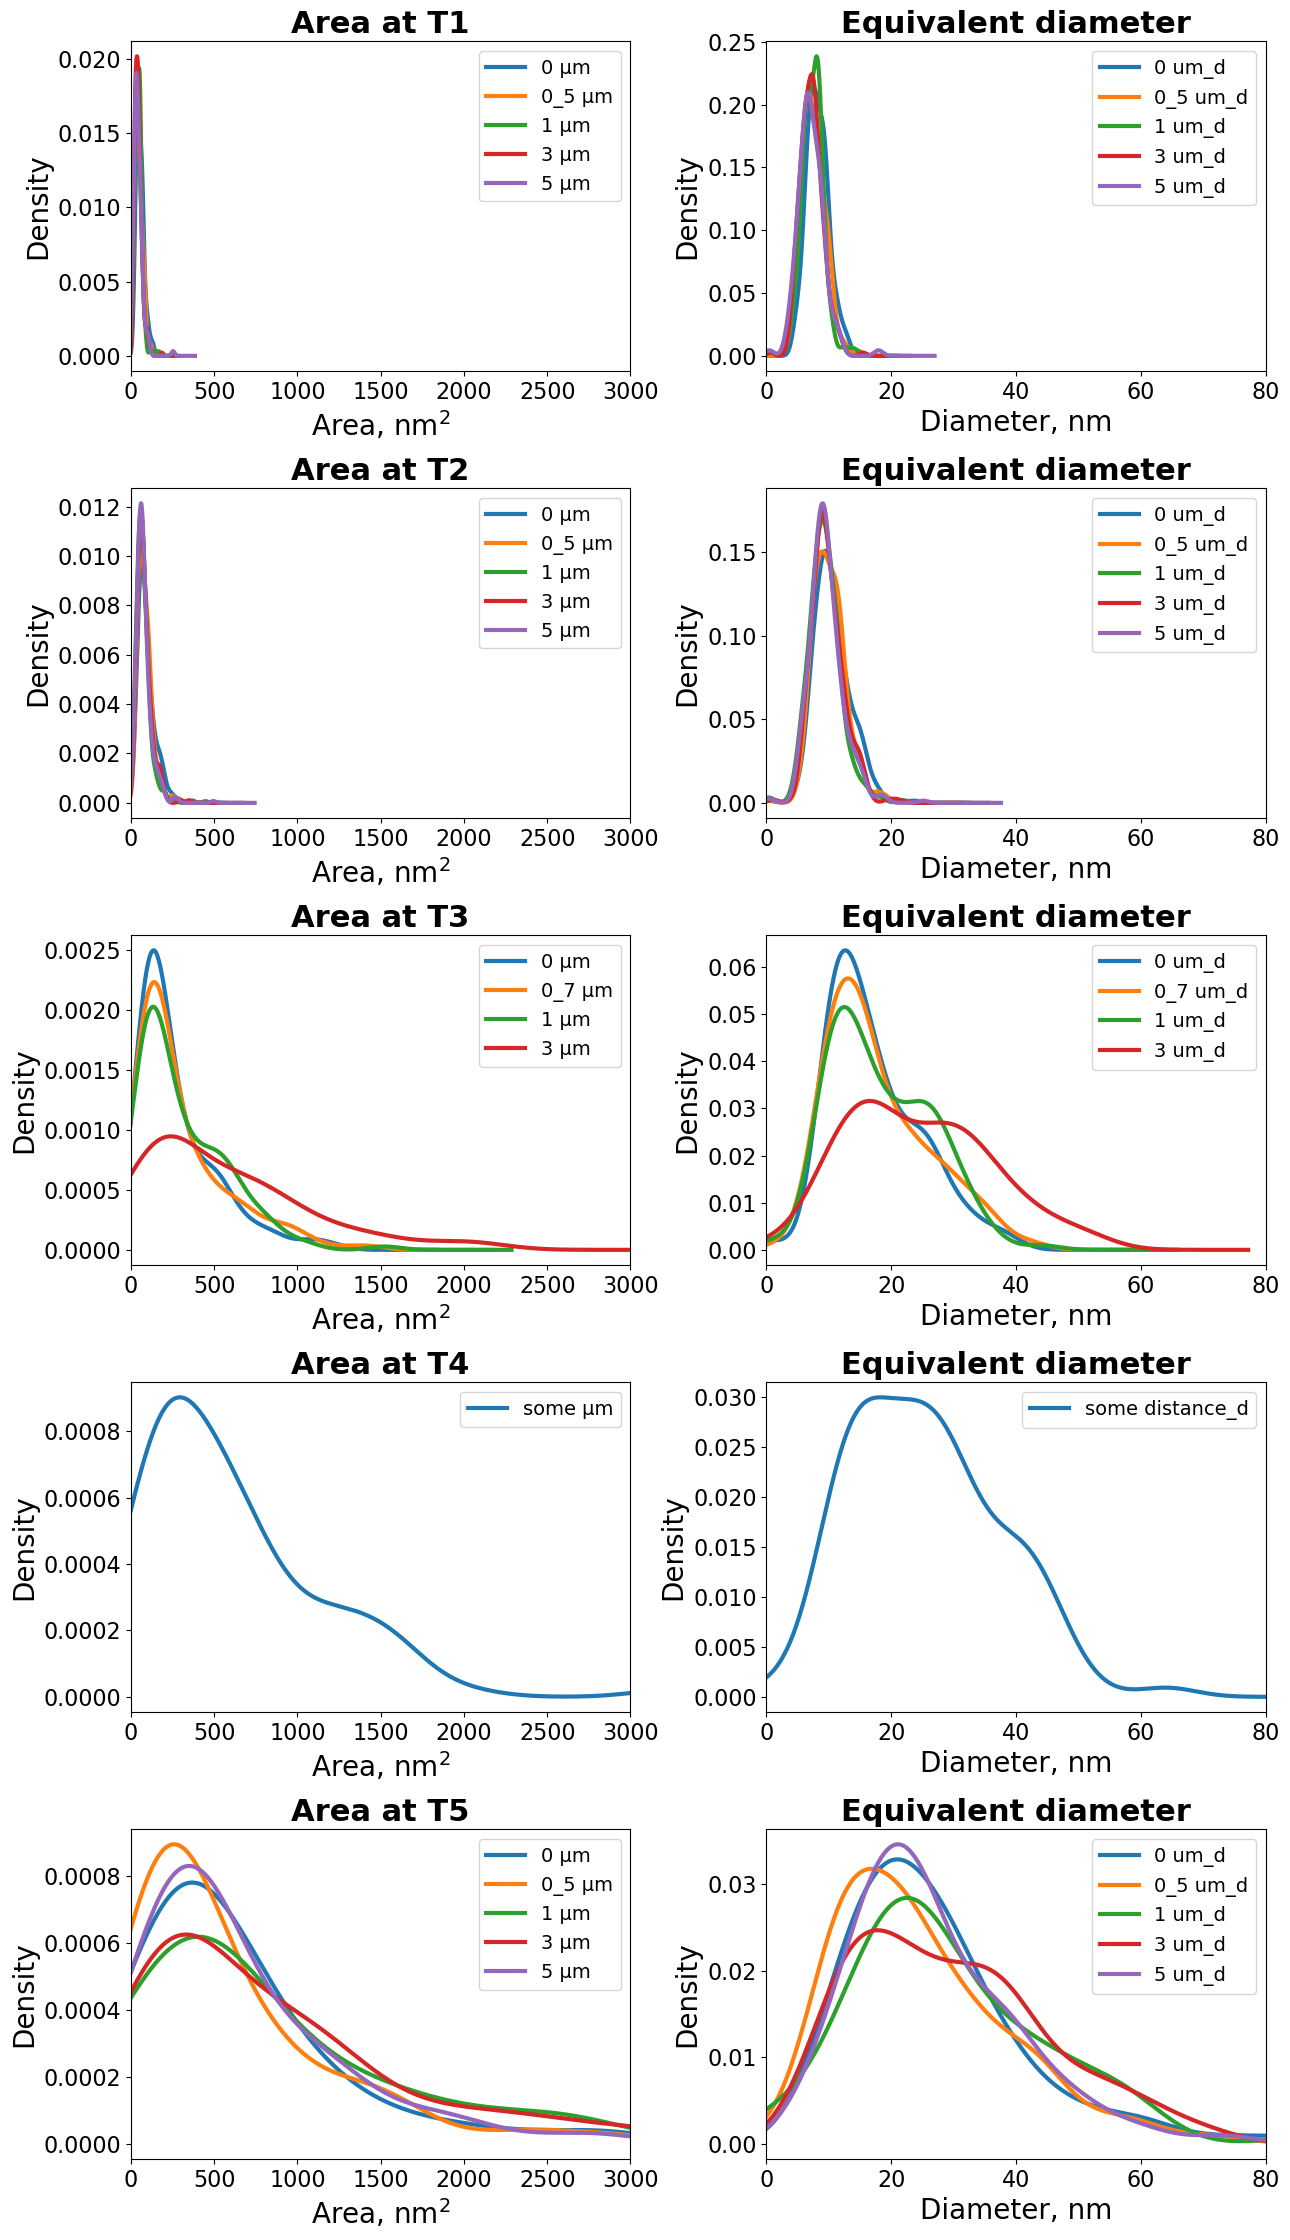

In [19]:
# x limits True or False
x_axis_limit = True

k = len(df_dict_folder.keys())
fig, ax = plt.subplots(nrows=k, ncols=2, figsize=(13, 4.5*k), 
                        # dpi=600
                        )
ax = ax.flatten()
for idx, folder in enumerate(df_dict_folder.keys()):
    print(f'-----------------------\n')
    print(f'Folder: {folder}\n')
    nrow = df_dict_folder[folder].shape[1]
    nrows = int(nrow/2)
    # histogram

    # make fig title
    # fig.suptitle(folder, fontsize=22, fontweight='bold', color='Blue')

    # Make histograms
    for i in range(nrows):
        # name of the column
        col_name = df_dict_folder[folder].columns[2*i]
        depth = col_name.split(' ')[0]+' µm'
        temperature = folder.split('_')[1]

        # # add KDE plot for Areas  
        df_dict_folder[folder].iloc[:, 2*i].plot.kde(ax=ax[2*idx],
                                                    # color='red',
                                                    linewidth=3,
                                                    label=depth
                                                    )
        ax[2*idx].set_title('Area at '+temperature, fontsize=22, fontweight='bold')
        ax[2*idx].set_ylabel('Density', fontsize=20)
        ax[2*idx].set_xlabel('Area, $\\mathrm{nm}^2$', fontsize=20)
        ax[2*idx].tick_params(axis='both', which='major', labelsize=16)
        if x_axis_limit:
            ax[2*idx].set_xlim(0, 3000)
        # ax[2*idx].set_xlim(0, 3000)
        # add legend
        ax[2*idx].legend(
                        fontsize=14, 
                        # loc='top right'
                            )

        # add KDE plot for Diameter
        df_dict_folder[folder].iloc[:, 2*i+1].plot.kde(ax=ax[2*idx+1],
                                                    # color='blue',
                                                    linewidth=3,
                                                    )
        ax[2*idx+1].set_title('Equivalent diameter', fontsize=22, fontweight='bold')
        ax[2*idx+1].set_ylabel('Density', fontsize=20)
        ax[2*idx+1].set_xlabel('Diameter, nm', fontsize=20)
        ax[2*idx+1].tick_params(axis='both', which='major', labelsize=16)
        if x_axis_limit:
            ax[2*idx+1].set_xlim(0, 80)
        ax[2*idx+1].set_xlim(0, 80)
        # add legend
        ax[2*idx+1].legend(
                        fontsize=14, 
                        # loc='top right'
                            )
fig.tight_layout()
    #save figure
if x_axis_limit:
    plt.savefig(path_to_save_big_plots + 'all_kde_plots_x_axis_limit.png', dpi=300)
else:
    plt.savefig(path_to_save_big_plots + 'all_kde_plots_no_x_limit.png', dpi=300)
# plt.savefig(path_to_save_big_plots + folder + '_kde_plots.png', dpi=300)
plt.show()

### This code performs the following tasks:

1. Initializes an empty DataFrame `df_areas_d_all`.
2. Iterates over each folder in `df_dict_folder`.
3. Selects columns with area values (even indices) and diameter values (odd indices).
4. Melts the selected columns into a single column for areas and a single column for diameters.
5. Concatenates the melted DataFrames for areas and diameters.
6. Appends the concatenated DataFrame to `df_areas_d_all`.
7. Saves the combined DataFrame `df_areas_d_all` to a CSV file.
8. Calculates descriptive statistics for the combined DataFrame, including:
   - Median
   - Mode
   - Variance
   - Skewness
   - Kurtosis
9. Saves the statistics to a CSV file.
10. Drops the even columns from the combined DataFrame.
11. Displays the statistics DataFrame.

This code is useful for combining area and diameter data from multiple folders, calculating comprehensive statistics, and saving the results for further analysis.

In [20]:

df_areas_d_all = pd.DataFrame()
for k, folder in enumerate(df_dict_folder.keys()):
# Выбираем столбцы с площадью (четные индексы)
    df_areas = df_dict_folder[folder].iloc[:, ::2]

    # Выбираем столбцы с диаметром (нечетные индексы)
    df_diameters = df_dict_folder[folder].iloc[:, 1::2]

    # Преобразуем столбцы в один
    df_areas_melted = df_areas.melt(var_name="Column", value_name=folder+"_A")
    df_diameters_melted = df_diameters.melt(var_name="Column", value_name=folder+"_d")

    # Объединяем два DataFrame в один
    df_final = pd.concat([df_areas_melted, df_diameters_melted], axis=1)
    df_areas_d_all = pd.concat([df_areas_d_all, df_final], axis=1)

#save dataframe
df_areas_d_all.to_csv(path_to_save_csv + 'all_areas_diameters.csv', index=False)

# statistics

df_areas_d_all_statistics = df_areas_d_all.describe()
#take only even columns of df_areas_d_all

# add median
df_areas_d_all_statistics.loc['median'] = df_areas_d_all.iloc[:,1::2].median()
# add mode
df_areas_d_all_statistics.loc['mode'] = df_areas_d_all.iloc[:,1::2].mode().iloc[0]
# add variance
df_areas_d_all_statistics.loc['variance'] = df_areas_d_all.iloc[:,1::2].var()
# add skewness
df_areas_d_all_statistics.loc['skewness'] = df_areas_d_all.iloc[:,1::2].skew()
# add kurtosis
df_areas_d_all_statistics.loc['kurtosis'] = df_areas_d_all.iloc[:,1::2].kurtosis()
# save statistics
df_areas_d_all_statistics.to_csv(path_to_save_csv + 'all_areas_diameters_statistics.csv', index=True)
# drop even columns
df_areas_d_all = df_areas_d_all.iloc[:, 1::2]
df_areas_d_all_statistics


LNMO_T1_A    LNMO_T1_d    LNMO_T2_A    LNMO_T2_d     LNMO_T3_A   
count     1051.000000  1051.000000  1679.000000  1679.000000    572.000000  \
mean        46.772185     7.477942    82.848358     9.902746    328.325687   
std         24.668762     1.906841    48.135663     2.725042    306.634903   
min          0.077934     0.315005     0.030271     0.196323      0.216614   
25%         30.746938     6.256853    51.431279     8.092239    109.319479   
50%         42.826634     7.384346    71.667776     9.552500    207.110780   
75%         58.133535     8.603366   101.183570    11.350371    475.451733   
max        256.366644    18.066991   495.384449    25.114599   2092.548221   
median      42.826634     7.384346    71.667776     9.552500    207.110780   
mode        12.156547     3.934234    30.174199     6.198305     85.545051   
variance   608.547826     3.636043  2317.042020     7.425855  94024.963443   
skewness     2.159106     0.560462     2.168046     0.769265      1.928270   
kurtosis    11.270810     2.349288     9.056095     2.138421      5.011963   

           LNMO_T3_d      LNMO_T4_A   LNMO_T4_d      LNMO_T5_A   LNMO_T5_d  
count     572.000000      93.000000   93.000000     580.000000  580.000000  
mean       18.581027     617.270044   25.495644     743.733117   27.204020  
std         8.538745     546.072070   11.721006     812.682140   14.396147  
min         0.525168       0.398569    0.712372       0.307591    0.625809  
25%        11.797872     193.171694   15.682916     221.995385   16.812273  
50%        16.238867     458.220119   24.154171     449.919486   23.934225  
75%        24.604143     834.291690   32.592226     986.340371   35.437865  
max        51.617004    3223.700212   64.066704    5992.165241   87.346790  
median     16.238867     458.220119   24.154171     449.919486   23.934225  
mode       10.436443       0.398569    0.712372       0.307591    0.625809  
variance   72.910161  298194.705526  137.381972  660452.261014  207.249058  
skewness    0.841584       1.719464    0.552393       2.398008    1.011903  
kurtosis    0.451421       4.580253    0.073218       7.810429    1.046161

### This code (currently commented out) performs the following tasks:

1. Imports necessary modules from the `docx` library for creating and formatting a Word document.
2. Creates a new Word document and sets the font style and size.
3. Changes the page orientation to landscape.
4. Adds a title and descriptive text explaining the statistics included in the document.
5. Iterates over the statistical data for each folder, creating a table for each folder's statistics:
   - Adds a table caption.
   - Creates a table and fills the first row with column names and the first column with row names.
   - Fills the table with statistical data.
   - Sets table alignment and font size.
   - Adds a page break after each table.
6. Saves the document to the specified path.
7. Opens the saved Word document.

This code is useful for generating a comprehensive Word document containing detailed statistical summaries for domain sizes in different folders.

In [85]:
# from docx import Document
# from docx.shared import Inches
# from docx.enum.table import WD_TABLE_ALIGNMENT
# from docx.enum.text import WD_ALIGN_PARAGRAPH
# from docx.shared import Pt

# # create a document
# document = Document()
# # set font size
# style = document.styles['Normal']
# font = style.font
# font.name = 'Times New Roman'
# font.size = Pt(12)
# # change page orientation
# sections = document.sections
# for section in sections:
#     section.orientation = 1 # 0 - portrait, 1 - landscape
#     section.page_width = Inches(11.69)
#     section.page_height = Inches(8.27)
# # add title
# document.add_heading('Domain size statistics', 0)
# # add text
# p = document.add_paragraph('The following tables contain descriptive statistics for domain size in each folder:\n')
# p.add_run('Area').bold = True
# p.add_run(' is the area of the domain in ')
# p.add_run('nm^2\n').bold = True
# p.add_run('Diameter').bold = True
# p.add_run(' is the equivalent diameter of the domain in ')
# p.add_run('nm\n').bold = True
# p.add_run('Count').bold = True
# p.add_run(' is the number of domains in the distribution\n')
# p.add_run('Mean').bold = True
# p.add_run(' is the mean of the distribution\n')
# p.add_run('Std').bold = True
# p.add_run(' is the standard deviation of the distribution\n')
# p.add_run('Min').bold = True
# p.add_run(' is the minimum value of the distribution\n')
# p.add_run('25%').bold = True
# p.add_run(' is the 25th percentile of the distribution\n')
# p.add_run('50%').bold = True
# p.add_run(' is the 50th percentile of the distribution\n')
# p.add_run('75%').bold = True
# p.add_run(' is the 75th percentile of the distribution\n')
# p.add_run('Max').bold = True
# p.add_run(' is the maximum value of the distribution\n')

# p.add_run('Skewness').bold = True
# p.add_run(' is the degree of distortion from the normal distribution\n')
# p.add_run('Kurtosis').bold = True
# p.add_run(' is the degree of peakedness of the distribution\n')
# p.add_run('Median').bold = True
# p.add_run(' is the median of the distribution\n')
# p.add_run('Mode').bold = True
# p.add_run(' is the mode of the distribution\n')
# p.add_run('Variance').bold = True
# p.add_run(' is the variance of the distribution')
# document.add_page_break()

# # loop over folders
# for idx, folder in enumerate(df_areas_d_all_statistics.keys()):
#     # add table caption
#     table_caption = document.add_paragraph()
#     table_caption.alignment = WD_ALIGN_PARAGRAPH.CENTER
#     table_caption.add_run(f'Table {idx+1}. Descriptive statistics for domain size in {folder}').bold = True
    
#     # Check if the dataframe is not empty
#     # if isinstance(df_areas_d_all_statistics[folder], pd.DataFrame) and df_areas_d_all_statistics[folder].shape[0] > 0 and df_areas_d_all_statistics[folder].shape[1] > 0:
#         # create a table
#     table = document.add_table(rows=df_areas_d_all_statistics[folder].shape[0]+1, cols=df_areas_d_all_statistics[folder].shape[1]+1)
#     table.style = 'Table Grid'
#     # fill the first row with column names
#     for j in range(df_areas_d_all_statistics[folder].shape[1]):
#         table.cell(0, j+1).text = df_areas_d_all_statistics[folder].columns[j]
#         #make the first row bold
#         table.cell(0, j+1).paragraphs[0].runs[0].font.bold = True
#     # fill the first column with row names
#     for i in range(df_areas_d_all_statistics[folder].shape[0]):
#         table.cell(i+1, 0).text = df_areas_d_all_statistics[folder].index[i]
#         #make the first column bold
#         table.cell(i+1, 0).paragraphs[0].runs[0].font.bold = True

#     # fill the table with data
#     for i in range(df_areas_d_all_statistics[folder].shape[0]):
#         for j in range(df_areas_d_all_statistics[folder].shape[1]):
#             table.cell(i+1, j+1).text = "{:.2f}".format(df_areas_d_all_statistics[folder].iloc[i, j])
#     # set table alignment
#     table.alignment = WD_TABLE_ALIGNMENT.CENTER
#     # set table font size
#     for row in table.rows:
#         for cell in row.cells:
#             paragraphs = cell.paragraphs
#             for paragraph in paragraphs:
#                 for run in paragraph.runs:
#                     font = run.font
#                     font.size = Pt(12)
    
#     # add new page
#     document.add_page_break()
# # save document
# document.save(path_to_save_csv + 'all_statistics.docx')

# #open document
# os.system(f'open {path_to_save_csv}all_statistics.docx')

### This code performs the following tasks:

1. Determines the number of rows needed for subplots based on the number of columns in `df_areas_d_all`.
2. Creates a figure with multiple subplots.
3. Iterates over each pair of columns (area and diameter) in `df_areas_d_all`.
4. For each area column:
   - Determines the number of bins for the histogram based on the kurtosis of the data.
   - Plots a histogram with density normalization and a KDE (Kernel Density Estimate) plot.
   - Sets titles, labels, and tick parameters for the axes.
   - Adds vertical lines for mean, median, and mode.
   - Adds text annotations for mean, median, mode, and standard deviation.
   - Adds a legend for the vertical lines.
5. For each diameter column:
   - Determines the number of bins for the histogram based on the kurtosis of the data.
   - Plots a histogram with density normalization and a KDE plot.
   - Sets titles, labels, and tick parameters for the axes.
   - Adds vertical lines for mean, median, and mode.
   - Adds text annotations for mean, median, mode, and standard deviation.
   - Adds a legend for the vertical lines.
6. Adjusts the layout of the figure.
7. Saves the figure as a PNG file in the specified path.
8. Displays the figure.

This code is useful for visualizing the distribution and density of domain areas and equivalent diameters, along with key statistical measures, for all columns in the combined DataFrame.

Area kurt < 0, use Sturges, bins = 12
Area kurt < 0, use Sturges, bins = 13
Area kurt < 0, use Sturges, bins = 11
Area kurt < 0, use Sturges, bins = 8
Area kurt < 0, use Sturges, bins = 11


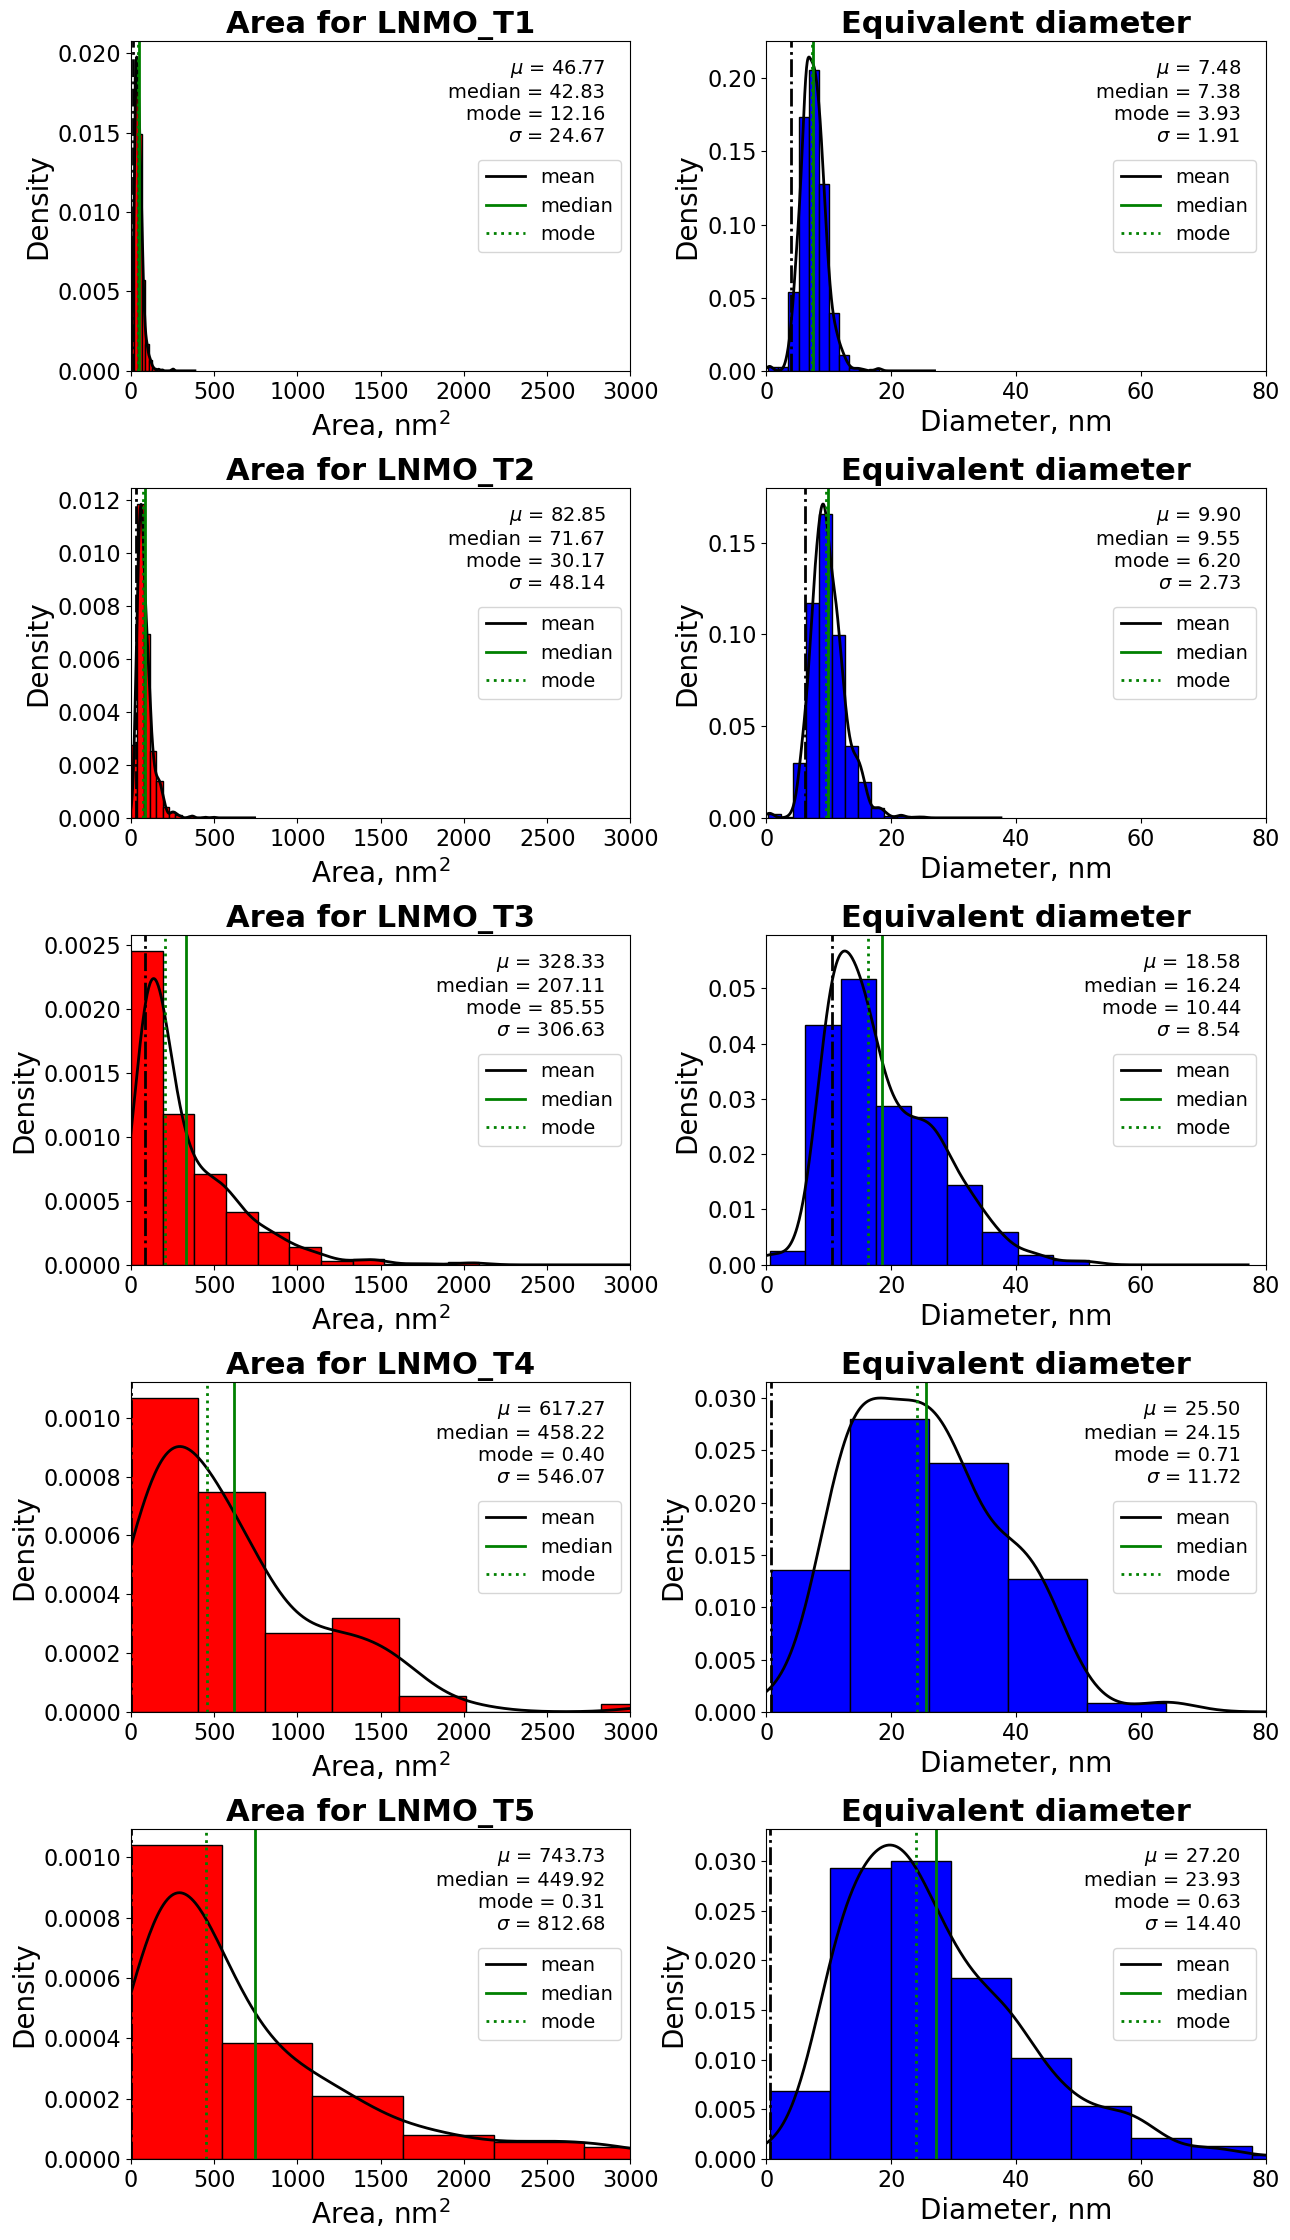

In [21]:

nrow = df_areas_d_all.shape[1]
nrows = int(nrow/2)
fig, axes = plt.subplots(nrows=nrows, ncols=2, figsize=(13, 4.5*nrows), 
                            # dpi=600
                            )
axes = axes.flatten()
# Make histograms
for i in range(nrows):
    
    
    # name of the column
    col_name = df_areas_d_all.columns[2*i]
    temp = col_name[:-2]
    # depth = ' at depth '+col_name.split(' ')[0]+' µm'
    #decide on number of bins
    data_colum_even = df_areas_d_all.iloc[:, 2*i].dropna() 
    n = len(data_colum_even)
    kurt = kurtosis(data_colum_even) * (len(data_colum_even) / 6.) ** 0.5
    if kurt > 0:
        bins = doanes(data_colum_even)
        print(f'Area kurt < 0, use Sturges, bins = {bins}')
    else:
        bins = sturges(n)
    # Make histogram for Area columns
    df_areas_d_all.iloc[:, 2*i].hist(ax=axes[2*i],
                                            # bins=50,
                                            bins=bins,
                                            color='red',
                                            edgecolor='black',  # Set the edgecolor to black
                                            grid=False, 
                                            density=True
                                            )
    # add KDE plot
    df_areas_d_all.iloc[:, 2*i].plot.kde(ax=axes[2*i],
                                                color='black',
                                                linewidth=2,
                                                )
    axes[2*i].set_title('Area for '+temp, fontsize=22, fontweight='bold')
    axes[2*i].set_ylabel('Density', fontsize=20)
    axes[2*i].set_xlabel('Area, $\\mathrm{nm}^2$', fontsize=20)
    axes[2*i].tick_params(axis='both', which='major', labelsize=16)
    axes[2*i].set_xlim(0, 3000)
    # calculate column mean and std
    mean = df_areas_d_all.iloc[:, 2*i].mean()
    std = df_areas_d_all.iloc[:, 2*i].std()
    # meadian
    median = df_areas_d_all.iloc[:, 2*i].median()
    # mode
    mode = df_areas_d_all.iloc[:, 2*i].mode().iloc[0]
    # add vertical lines
    axes[2*i].axvline(mean, color='green', linestyle='solid', linewidth=2)
    # axes[2*i].axvline(mean+std, color='black', linestyle='dashed', linewidth=2)
    # axes[2*i].axvline(mean-std, color='black', linestyle='dashed', linewidth=2)
    axes[2*i].axvline(median, color='green', linestyle='dotted', linewidth=2)
    axes[2*i].axvline(mode, color='black', linestyle='dashdot', linewidth=2)
    # add text
    axes[2*i].text(0.95, 0.95, f'$\\mu$ = {mean:.2f}\nmedian = {median:.2f}\nmode = {mode:.2f}\n$\\sigma$ = {std:.2f}',
                verticalalignment='top', 
                horizontalalignment='right',
                transform=axes[2*i].transAxes,
                color='black', fontsize=14)
    # add legend for lines
    axes[2*i].legend(['mean', 
                    # 'mean+std', 
                    # 'mean-std', 
                    'median', 
                    'mode'
                    ], fontsize=14, loc='center right')
    # decide on number of bins
    data_colum_even = df_areas_d_all.iloc[:, 2*i+1].dropna()
    n = len(data_colum_even)
    kurt = kurtosis(data_colum_even) * (len(data_colum_even) / 6.) ** 0.5
    if kurt > 0:
        bins = doanes(data_colum_even)
    else:
        bins = sturges(n)
        print(f'Diameter kurt < 0, use Sturges, bins = {bins}')
    # Make histogram for Diameter columns
    df_areas_d_all.iloc[:, 2*i+1].hist(ax=axes[2*i+1],
                                            # bins=50,
                                            bins=bins,
                                            color='blue',
                                            edgecolor='black',  # Set the edgecolor to black
                                            grid=False,
                                            density=True
                                            )
    # add KDE plot
    df_areas_d_all.iloc[:, 2*i+1].plot.kde(ax=axes[2*i+1],
                                                color='black',
                                                linewidth=2,
                                                )
    axes[2*i+1].set_title('Equivalent diameter', fontsize=22, fontweight='bold')
    axes[2*i+1].set_ylabel('Density', fontsize=20)
    axes[2*i+1].set_xlabel('Diameter, nm', fontsize=20)
    axes[2*i+1].tick_params(axis='both', which='major', labelsize=16)
    axes[2*i+1].set_xlim(0, 80)
    # calculate column mean and std
    mean = df_areas_d_all.iloc[:, 2*i+1].mean()
    std = df_areas_d_all.iloc[:, 2*i+1].std()
    # meadian
    median = df_areas_d_all.iloc[:, 2*i+1].median()
    # mode
    mode = df_areas_d_all.iloc[:, 2*i+1].mode().iloc[0]
    # add vertical lines
    axes[2*i+1].axvline(mean, color='green', linestyle='solid', linewidth=2)
    # axes[2*i+1].axvline(mean+std, color='black', linestyle='dashed', linewidth=2)
    # axes[2*i+1].axvline(mean-std, color='black', linestyle='dashed', linewidth=2)
    axes[2*i+1].axvline(median, color='green', linestyle='dotted', linewidth=2)
    axes[2*i+1].axvline(mode, color='black', linestyle='dashdot', linewidth=2)
    # add text
    axes[2*i+1].text(0.95, 0.95, f'$\\mu$ = {mean:.2f}\nmedian = {median:.2f}\nmode = {mode:.2f}\n$\\sigma$ = {std:.2f}',
                verticalalignment='top', 
                horizontalalignment='right',
                transform=axes[2*i+1].transAxes,
                color='black', fontsize=14)
    # add legend for lines
    axes[2*i+1].legend(['mean', 
                    # 'mean+std', 
                    # 'mean-std', 
                    'median', 
                    'mode'
                    ], fontsize=14, loc='center right')
fig.tight_layout()
#save figure
plt.savefig(path_to_save_big_plots + 'all_areas_diameters_histograms.png', dpi=300)
plt.show()

### This code performs the following tasks:

1. Creates a figure with two subplots.
2. Generates KDE (Kernel Density Estimate) plots for all area columns in the first subplot:
   - Sets the title, labels, and tick parameters for the axes.
   - Limits the x-axis range to 0-3000.
   - Adds a legend to the plot.
3. Generates KDE plots for all diameter columns in the second subplot:
   - Sets the title, labels, and tick parameters for the axes.
   - Limits the x-axis range to 0-80.
   - Adds a legend to the plot.
4. Adjusts the layout of the figure.
5. Saves the figure as a PNG file in the specified path.
6. Displays the figure.

This code is useful for visualizing the density distribution of domain areas and equivalent diameters across all columns in the combined DataFrame.

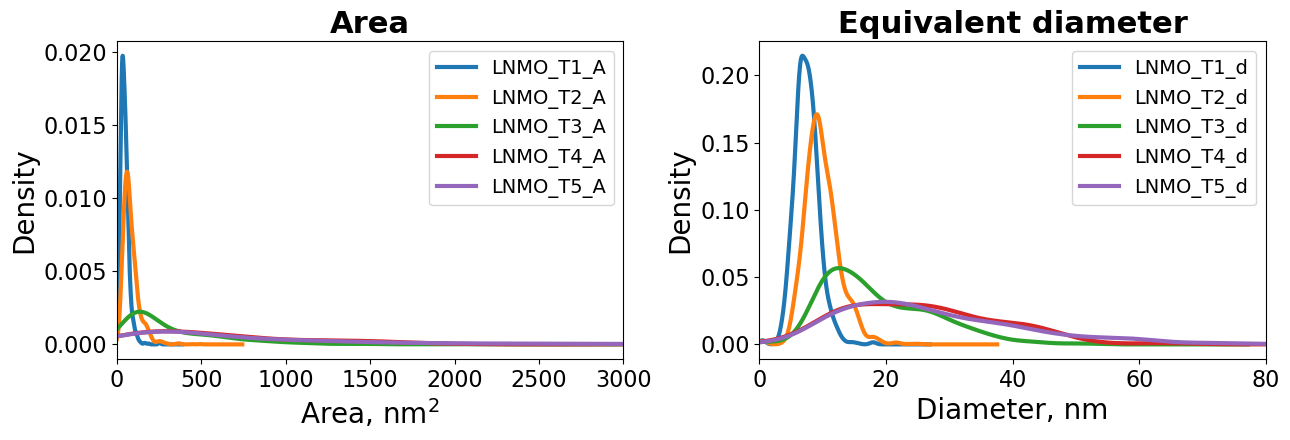

In [22]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13, 4.5), 
                            # dpi=600
                            )

# for idx, folder in enumerate(df_areas_d_all.columns):
    # add KDE plot for Areas  
df_areas_d_all.iloc[:, ::2].plot.kde(ax=axes[0],
                                            # color='red',
                                            linewidth=3,
                                            label=folder
                                            )
axes[0].set_title('Area', fontsize=22, fontweight='bold')
axes[0].set_ylabel('Density', fontsize=20)
axes[0].set_xlabel('Area, $\\mathrm{nm}^2$', fontsize=20)
axes[0].tick_params(axis='both', which='major', labelsize=16)
axes[0].set_xlim(0, 3000)
# add legend
axes[0].legend(
                fontsize=14, 
                # loc='top right'
                    )

# add KDE plot for Diameter
df_areas_d_all.iloc[:, 1::2].plot.kde(ax=axes[1],
                                            # color='blue',
                                            linewidth=3,
                                            )
axes[1].set_title('Equivalent diameter', fontsize=22, fontweight='bold')
axes[1].set_ylabel('Density', fontsize=20)
axes[1].set_xlabel('Diameter, nm', fontsize=20)
axes[1].tick_params(axis='both', which='major', labelsize=16)
axes[1].set_xlim(0, 80)
# add legend
axes[1].legend(
                fontsize=14, 
                # loc='top right'
                    )
fig.tight_layout()
#save figure
plt.savefig(path_to_save_big_plots + 'all_areas_diameters_kde_plots.png', dpi=300)
plt.show()

### This code performs the following tasks:

1. Creates a figure with two subplots.
2. Generates a box plot for all area columns in the first subplot:
   - Displays means and medians with specific colors and line widths.
   - Sets the title, labels, and tick parameters for the axes.
   - Adjusts tick labels to show temperature.
   - Overlays actual data points on the box plot.
3. Generates a box plot for all diameter columns in the second subplot:
   - Displays means and medians with specific colors and line widths.
   - Sets the title, labels, and tick parameters for the axes.
   - Adjusts tick labels to show temperature.
   - Overlays actual data points on the box plot.
4. Adjusts the layout of the figure.
5. Saves the figure as a PNG file in the specified path.
6. Displays the figure.

This code is useful for visualizing the distribution of domain areas and equivalent diameters across different temperatures, along with key statistical measures.

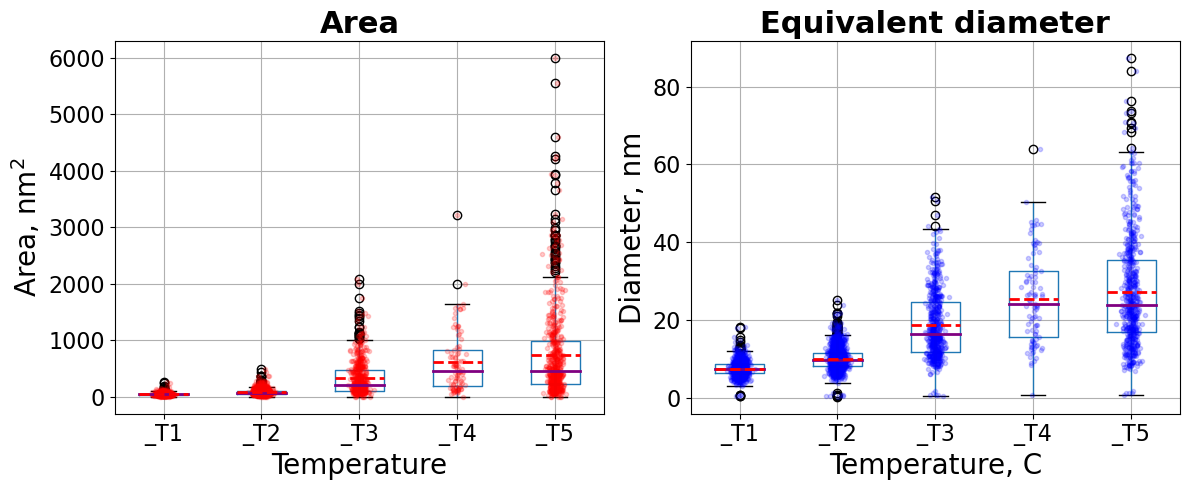

In [23]:
# boxplot
fig, ax = plt.subplots(1, 2, figsize=(12, 5), 
                        # dpi=600
                        )
# Make box plot for Area columns
df_areas_d_all.iloc[:, ::2].boxplot(ax=ax[0],
                                    showmeans=True,
                                    meanline=True,
                                    meanprops={'color': 'red', 'linewidth': 2},
                                    medianprops={'color': 'purple','linewidth': 2},
                                    )
ax[0].set_title('Area', fontsize=22, fontweight='bold')
ax[0].set_ylabel('Area, $\\mathrm{nm}^2$', fontsize=20)
ax[0].set_xlabel('Temperature', fontsize=20)
ax[0].tick_params(axis='both', which='major', labelsize=16)
# change xticklabels
xticklabels = [item.get_text() for item in ax[0].get_xticklabels()]
# xticklabels = [xticklabel[:-2] for xticklabel in xticklabels]
xticklabels = [xticklabel[4:7] for xticklabel in xticklabels]
ax[0].set_xticklabels(xticklabels)
# add overlay with actual data
for i in range(len(list(df_areas_d_all.iloc[:, ::2].columns))):
    y = df_areas_d_all.iloc[:, ::2].iloc[:, i]
    x = np.random.normal(i+1, 0.04, size=len(y))
    ax[0].plot(x, y, 'r.', alpha=0.2)


# Make box plot for Diameter columns
df_areas_d_all.iloc[:, 1::2].boxplot(ax=ax[1],
                                    showmeans=True,
                                    meanline=True,
                                    meanprops={'color': 'red', 'linewidth': 2},
                                    medianprops={'color': 'purple','linewidth': 2},
                                    )
ax[1].set_title('Equivalent diameter', fontsize=22, fontweight='bold')
ax[1].set_ylabel('Diameter, nm', fontsize=20)
ax[1].set_xlabel('Temperature, C', fontsize=20)
ax[1].tick_params(axis='both', which='major', labelsize=16)
# change xticklabels
xticklabels = [item.get_text() for item in ax[1].get_xticklabels()]
xticklabels = [xticklabel[4:7] for xticklabel in xticklabels]
ax[1].set_xticklabels(xticklabels)
# add overlayt with actual data
for i in range(len(list(df_areas_d_all.iloc[:, 1::2].columns))):
    y = df_areas_d_all.iloc[:, 1::2].iloc[:, i]
    x = np.random.normal(i+1, 0.04, size=len(y))
    ax[1].plot(x, y, 'b.', alpha=0.2)
fig.tight_layout()
#save figure
plt.savefig(path_to_save_big_plots + 'all_areas_diameters_boxplots.png', dpi=300)
plt.show()


### This code performs the following tasks:

1. Creates a figure with two subplots.
2. Generates a bar plot for the mean values of all area columns in the first subplot:
   - Displays error bars representing the standard deviation.
   - Sets the title, labels, and tick parameters for the axes.
   - Adjusts tick labels to show temperature and sets them to horizontal orientation.
3. Generates a bar plot for the mean values of all diameter columns in the second subplot:
   - Displays error bars representing the standard deviation.
   - Sets the title, labels, and tick parameters for the axes.
   - Adjusts tick labels to show temperature and sets them to horizontal orientation.
4. Adjusts the layout of the figure.
5. Saves the figure as a PNG file in the specified path.
6. Displays the figure.

This code is useful for visualizing the mean values and variability (standard deviation) of domain areas and equivalent diameters across different temperatures.

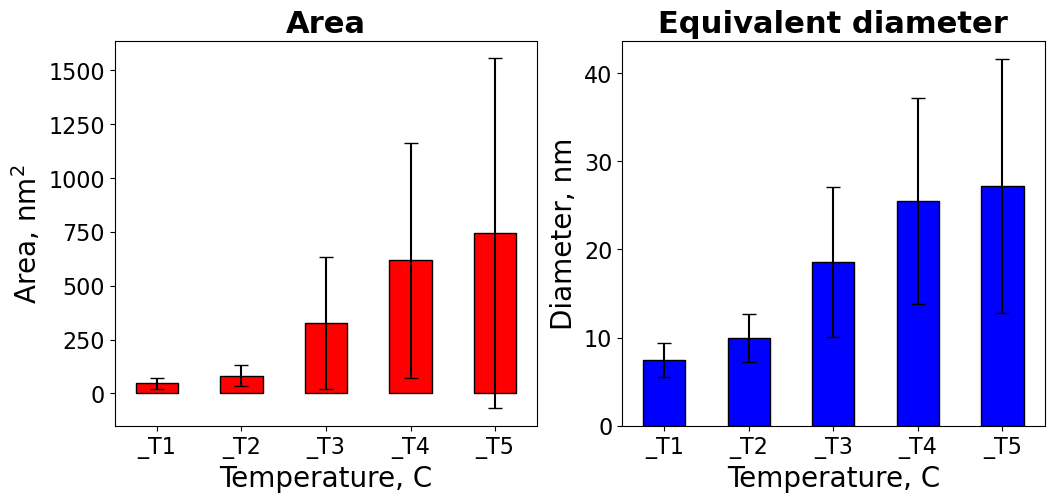

In [24]:
# bar plot
fig, ax = plt.subplots(1, 2, figsize=(12, 5), 
                        # dpi=600
                        )
# Make bar plot for Area columns
df_areas_d_all.iloc[:, ::2].mean().plot.bar(ax=ax[0],
                                            yerr=df_areas_d_all.iloc[:, ::2].std(),
                                            capsize=5,
                                            color='red',
                                            edgecolor='black'  # Set the edgecolor to black
                                            )
ax[0].set_title('Area', fontsize=22, fontweight='bold')
ax[0].set_ylabel('Area, $\\mathrm{nm}^2$', fontsize=20)
ax[0].set_xlabel('Temperature, C', fontsize=20)
ax[0].tick_params(axis='both', which='major', labelsize=16)
# change xticklabels
xticklabels = [item.get_text() for item in ax[0].get_xticklabels()]
xticklabels = [xticklabel[4:7] for xticklabel in xticklabels]
ax[0].set_xticklabels(xticklabels)
# make tick label horizontal
for tick in ax[0].get_xticklabels():
    tick.set_rotation(0)
    

# Make bar plot for Diameter columns
df_areas_d_all.iloc[:, 1::2].mean().plot.bar(ax=ax[1],
                                            yerr=df_areas_d_all.iloc[:, 1::2].std(),
                                            capsize=5,
                                            color='blue',
                                            edgecolor='black'  # Set the edgecolor to black
                                            )
ax[1].set_title('Equivalent diameter', fontsize=22, fontweight='bold')
ax[1].set_ylabel('Diameter, nm', fontsize=20)
ax[1].set_xlabel('Temperature, C', fontsize=20)
ax[1].tick_params(axis='both', which='major', labelsize=16)
# change xticklabels
xticklabels = [item.get_text() for item in ax[1].get_xticklabels()]
xticklabels = [xticklabel[4:7] for xticklabel in xticklabels]
ax[1].set_xticklabels(xticklabels)
for tick in ax[1].get_xticklabels():
    tick.set_rotation(0)
fig.tight_layout
#save figure
plt.savefig(path_to_save_big_plots + 'all_areas_diameters_barplots.png', dpi=300)
plt.show()